# Credit-Line | EDA | NBKI признаки

- [Анализ пропусков](#Анализ-пропусков)
- [Анализ распределений](#Анализ-распределений)
- [Корреляции](#Корреляции)

## TODO:
* квази-константные фичи

In [1]:
import re
import sys
import os
sys.path.append('..')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

import utils
from utils.eda import num_feature_report
from utils.eda import cat_feature_report

In [2]:
DATA_PATH = os.path.join('..', 'data', 'raw', 'raw.csv')

In [3]:
nbki = pd.read_csv(
    DATA_PATH,
    index_col='AppId',
    parse_dates=['dtstart'],
    usecols=[
        'AppId',
        'dtstart',

        'Total_accounts',
        'Total_negative_accounts',
        'Total_active_accounts',
        'Total_credit_limit',
        'Total_overdue_amount',
        'Total_outstanding_amount',
        'Total_installment_amount',
        'Total_installment_amount_calc',
        'Total_disputed',
        'Total_letigation',
        'Total_bankruptcy',
        'Total_inquiries',
        'Recent_inquiries',
        'CH_length',
        'Nb_delays_5_30_ever',
        'Nb_delays_30_60_ever',
        'Nb_delays_60_90_ever',
        'Nb_delays_90_ever',
        'Nb_delays_5_30_2y',
        'Nb_delays_30_60_2y',
        'Nb_delays_60_90_2y',
        'Nb_delays_90_2y',
        'Days_since_last_credit',
        'Own_active_accounts_nb',
        'Max_overdue',
        'RCC_credit_limit',
        'RCC_overdue_amount',
        'Nb_active_mortgages',
        'Nb_active_microcredits',
        'Total_mortgages',
        'Total_microcredits',
        'Nb_active_consumer_credit',
        'Nb_active_rcc',
        'Total_consumer_credit',
        'Total_rcc',
        
        '60_6mob',
        '30_2mob',
    ],
)

nbki = nbki.query('dtstart < "2023-08-01"')
nbki['60_6mob'] = nbki['60_6mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета
nbki['30_2mob'] = nbki['30_2mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета

In [4]:
nbki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24350 entries, 888776 to 1912560
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dtstart                        24350 non-null  datetime64[ns]
 1   Total_accounts                 21977 non-null  float64       
 2   Total_negative_accounts        21977 non-null  float64       
 3   Total_active_accounts          21977 non-null  float64       
 4   Total_credit_limit             21977 non-null  float64       
 5   Total_overdue_amount           21977 non-null  float64       
 6   Total_outstanding_amount       21977 non-null  float64       
 7   Total_installment_amount       21977 non-null  float64       
 8   Total_installment_amount_calc  21977 non-null  float64       
 9   Total_disputed                 21977 non-null  float64       
 10  Total_letigation               21977 non-null  float64       
 11  Total_bankrup

## Анализ пропусков

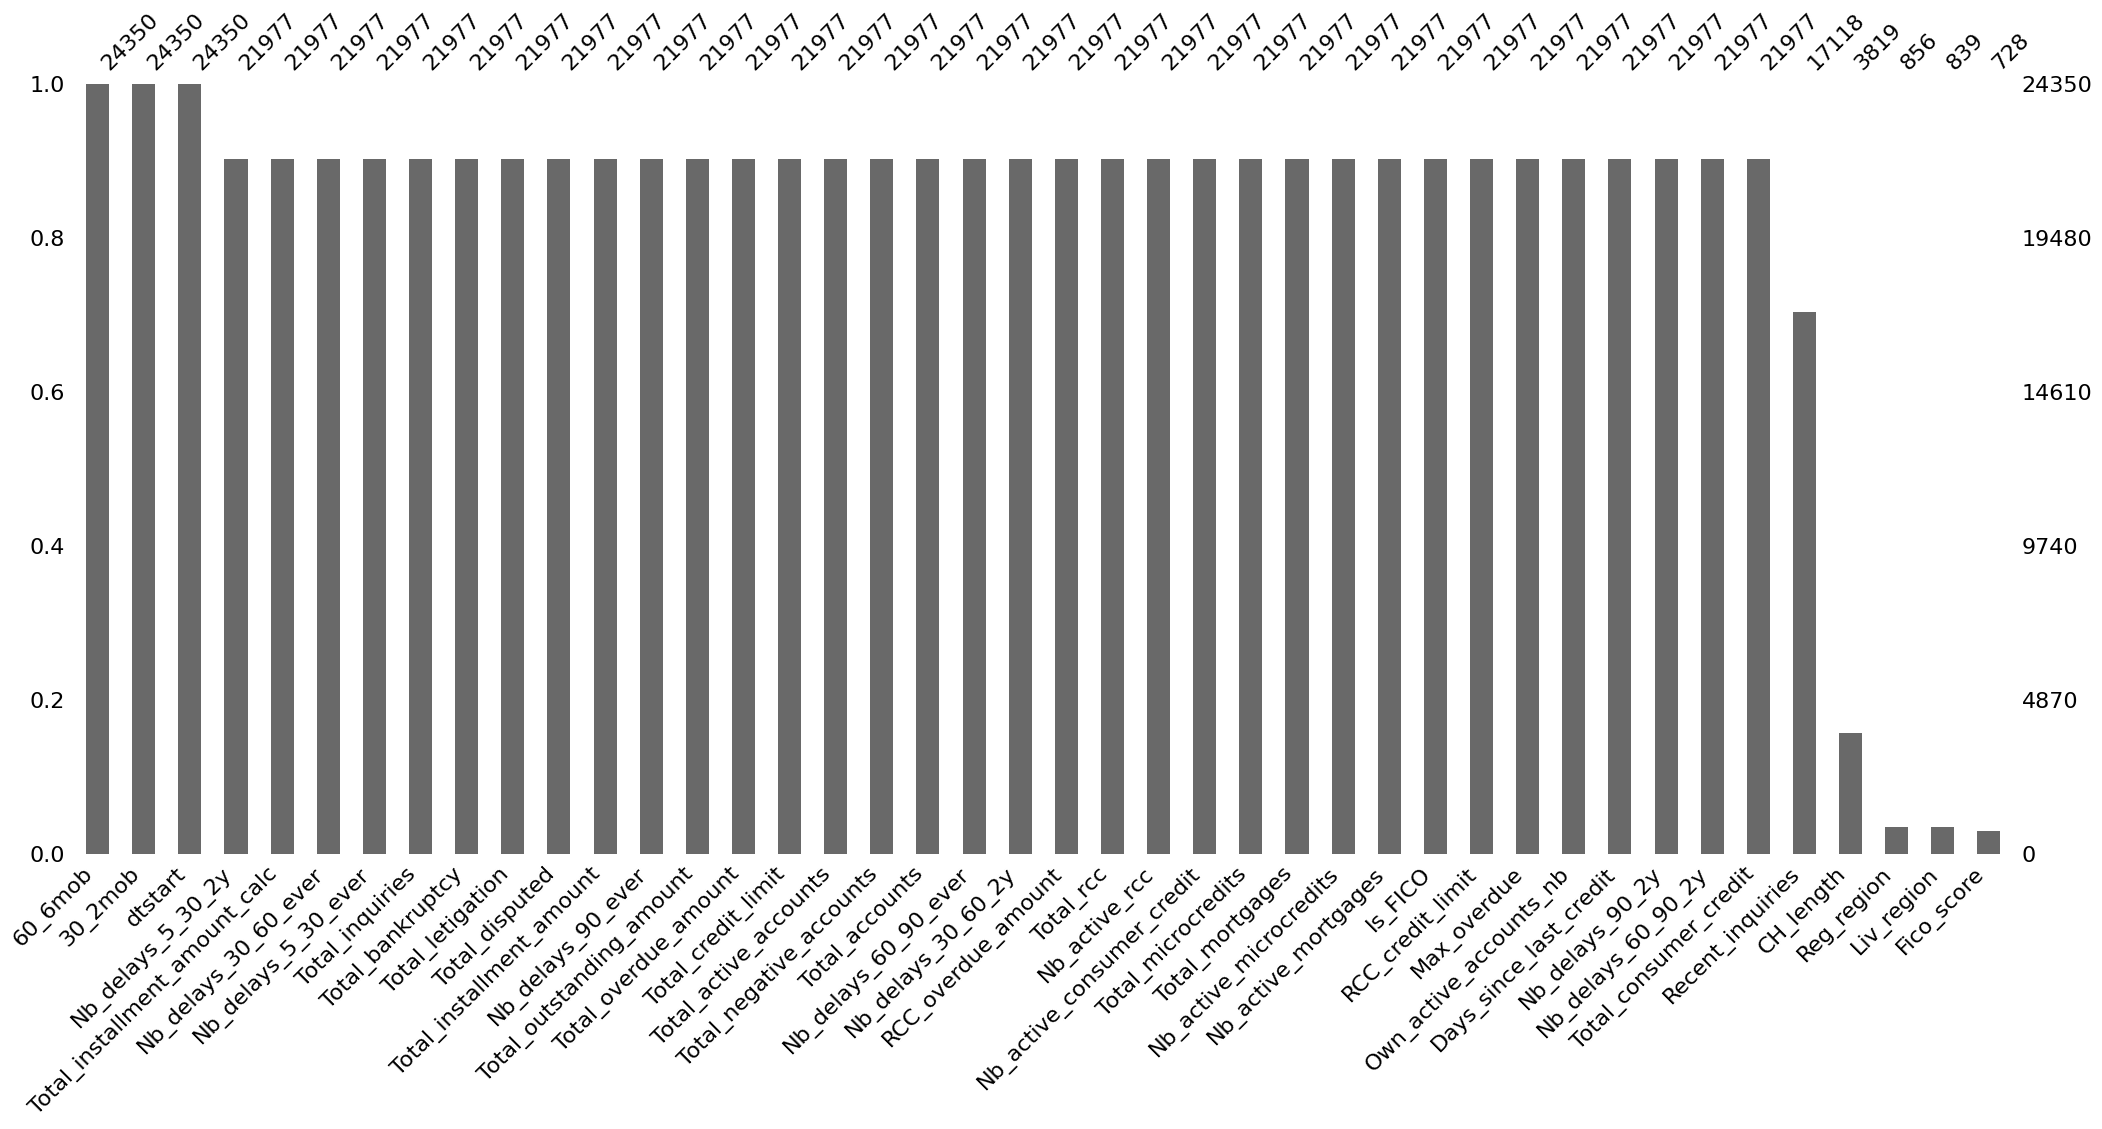

In [5]:
ax = msno.bar(nbki, sort='descending')

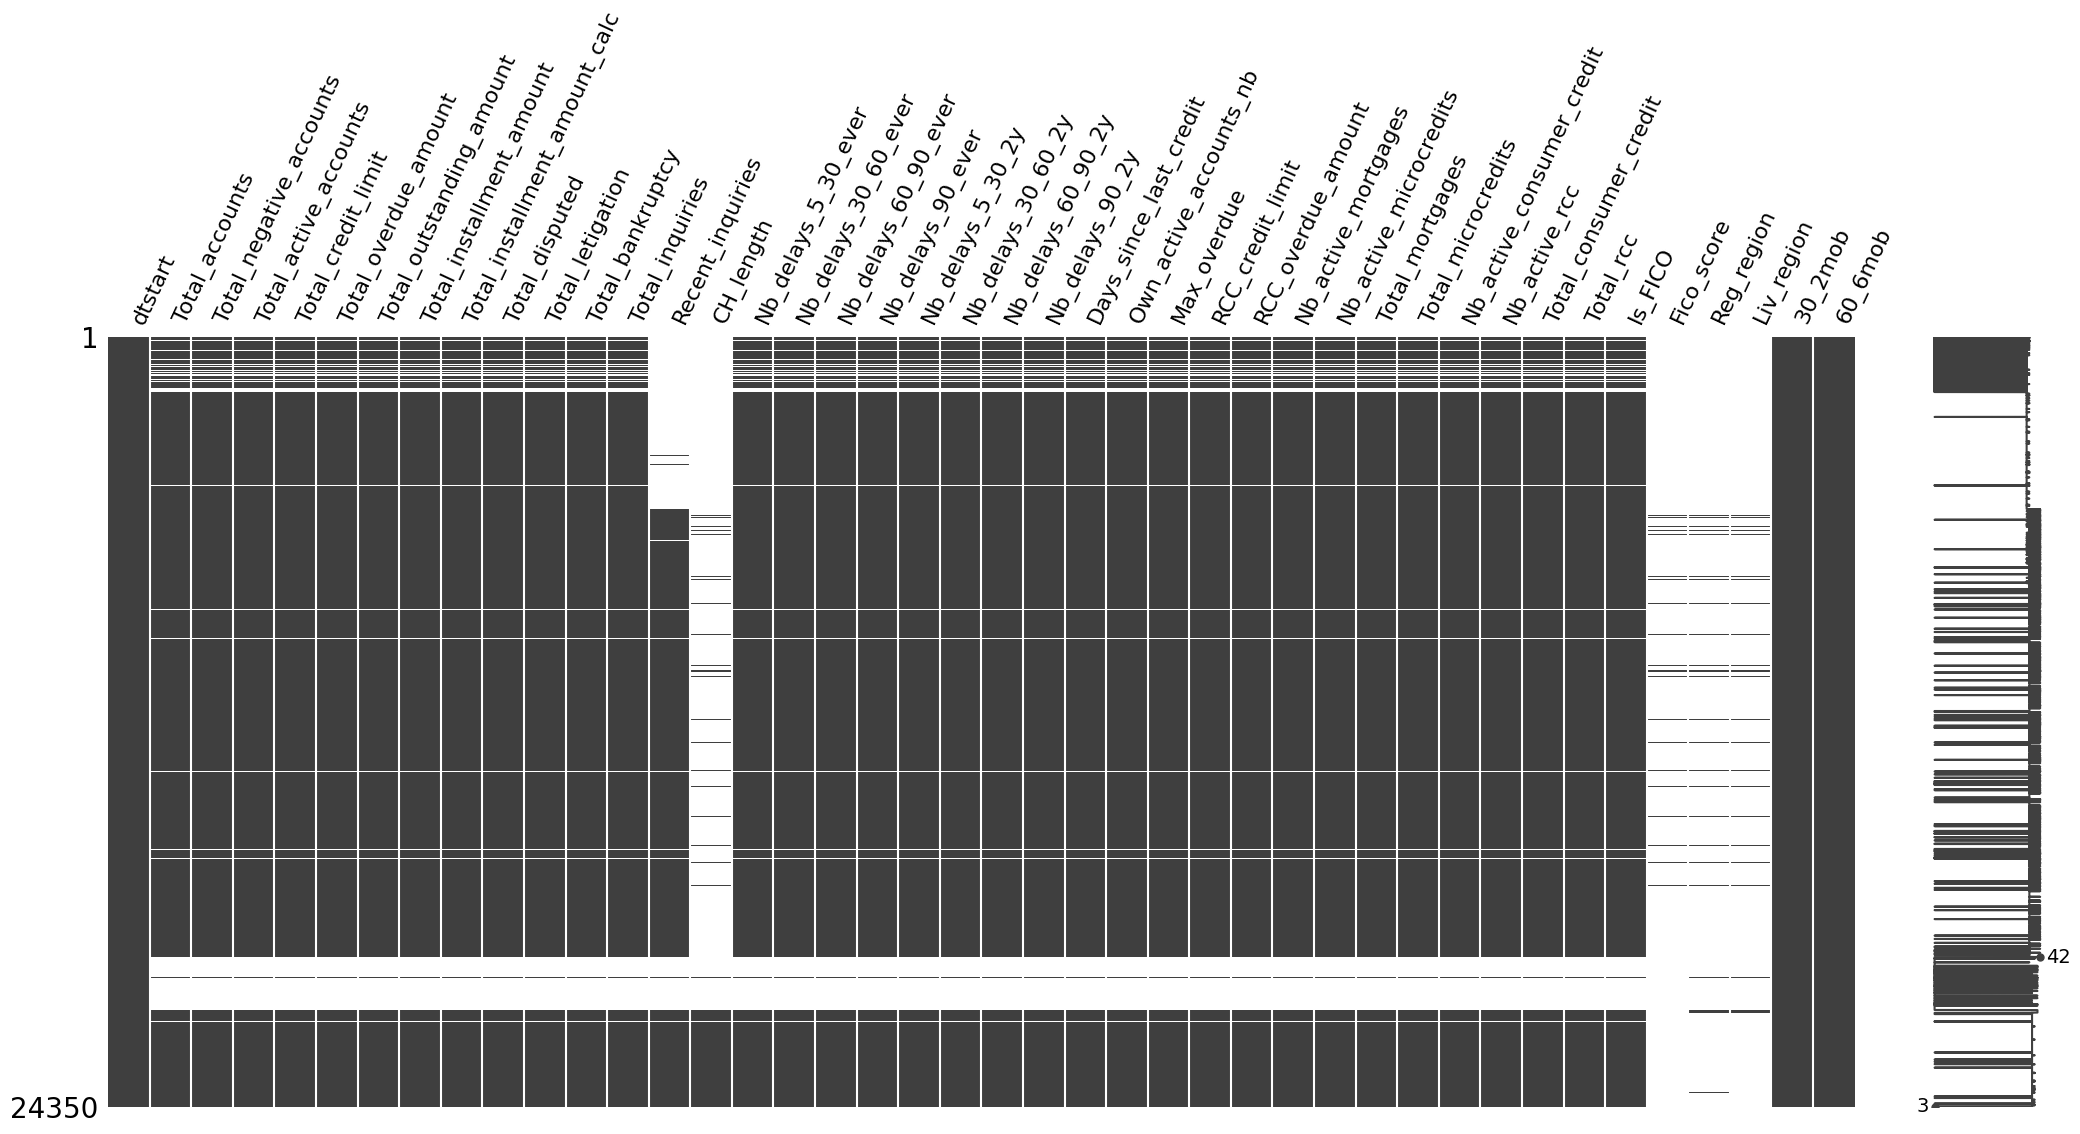

In [6]:
ax = msno.matrix(nbki.sort_values('dtstart'), label_rotation=65)

## Анализ распределений

### `Total_accounts` - Общее количество счетов

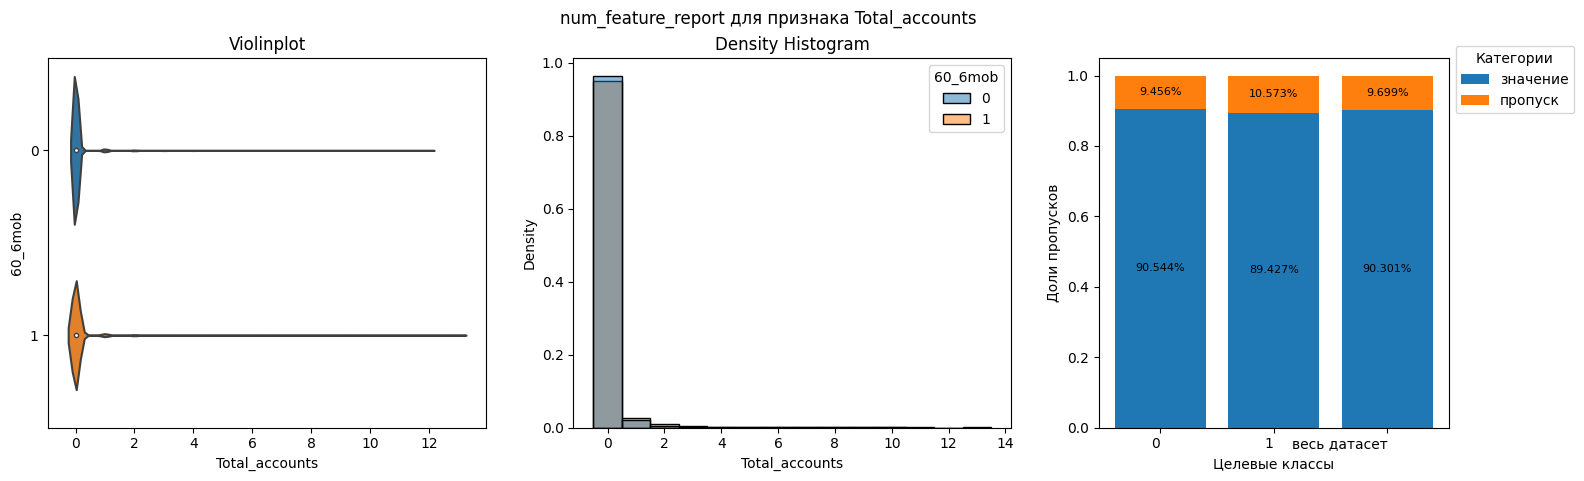

In [8]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_accounts',
    target_colname='60_6mob',
    histplot_args={'discrete': True}
)

### `Total_negative_accounts` - Количество счетов с негативным рейтингом

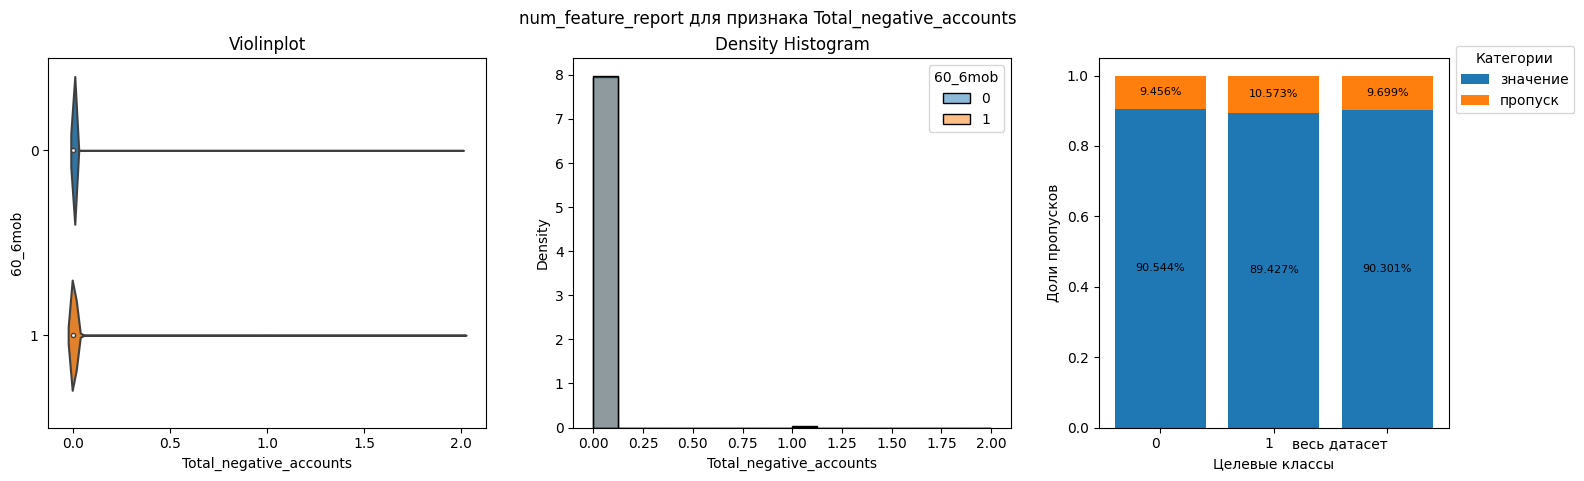

In [12]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_negative_accounts',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

### `Total_active_accounts` - Количество активных счетов	

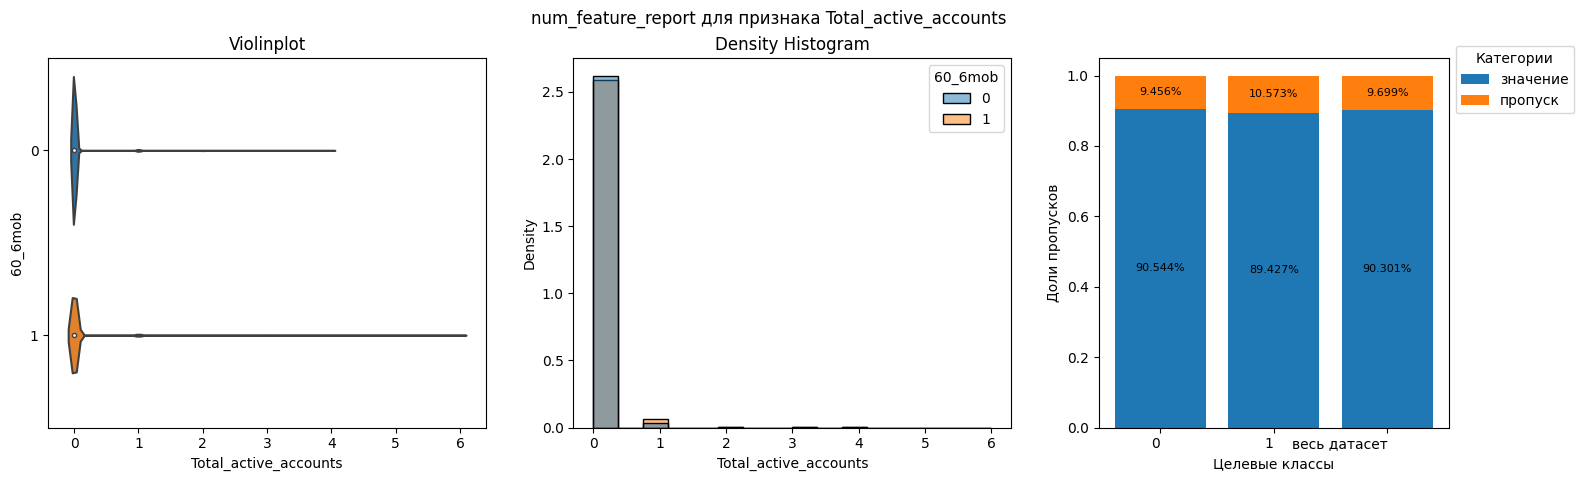

In [13]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Total_active_accounts', target_colname='60_6mob')

### `Total_credit_limit` - Общая сумма кредитов по активным счетам	

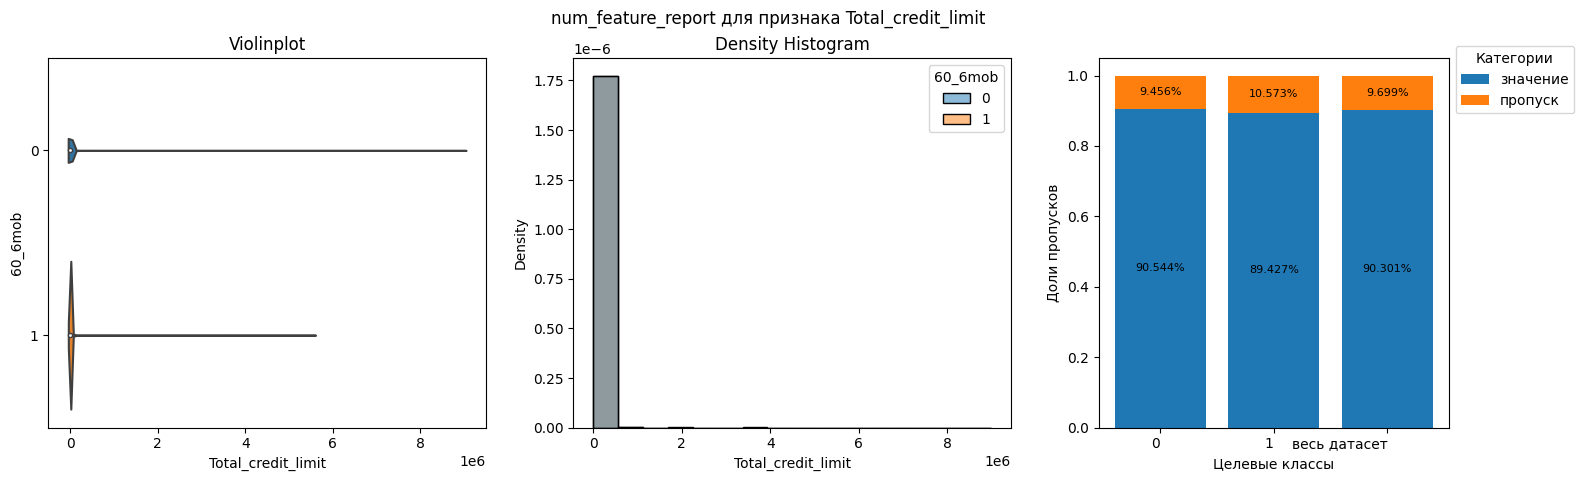

In [15]:
fig, axes = utils.eda.num_feature_report(
    nbki, 
    feature_colname='Total_credit_limit', 
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

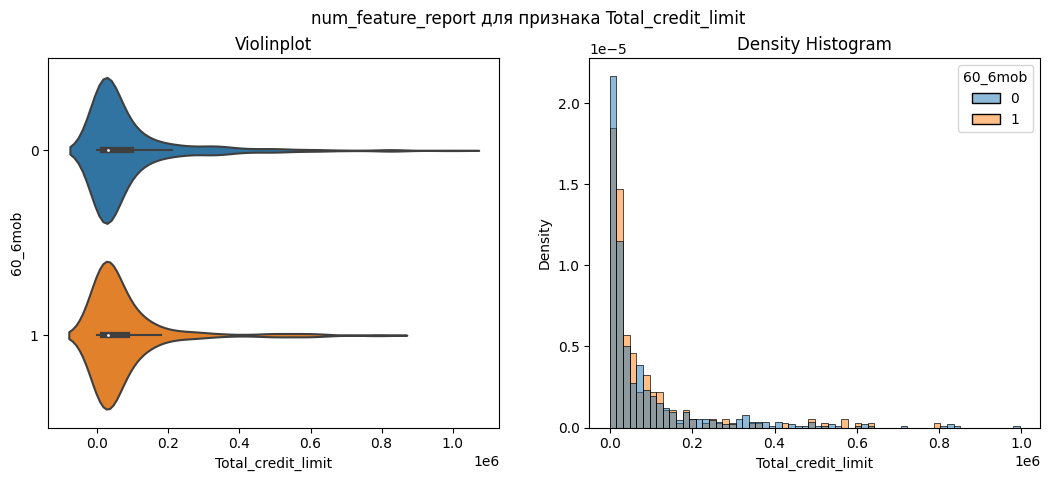

In [16]:
fig, axes = utils.eda.num_feature_report(
    nbki.query('Total_credit_limit != 0 and Total_credit_limit <= 1_000_000'),
    feature_colname='Total_credit_limit',
    target_colname='60_6mob'
)

### `Total_overdue_amount` - Общая сумма просроченных платежей

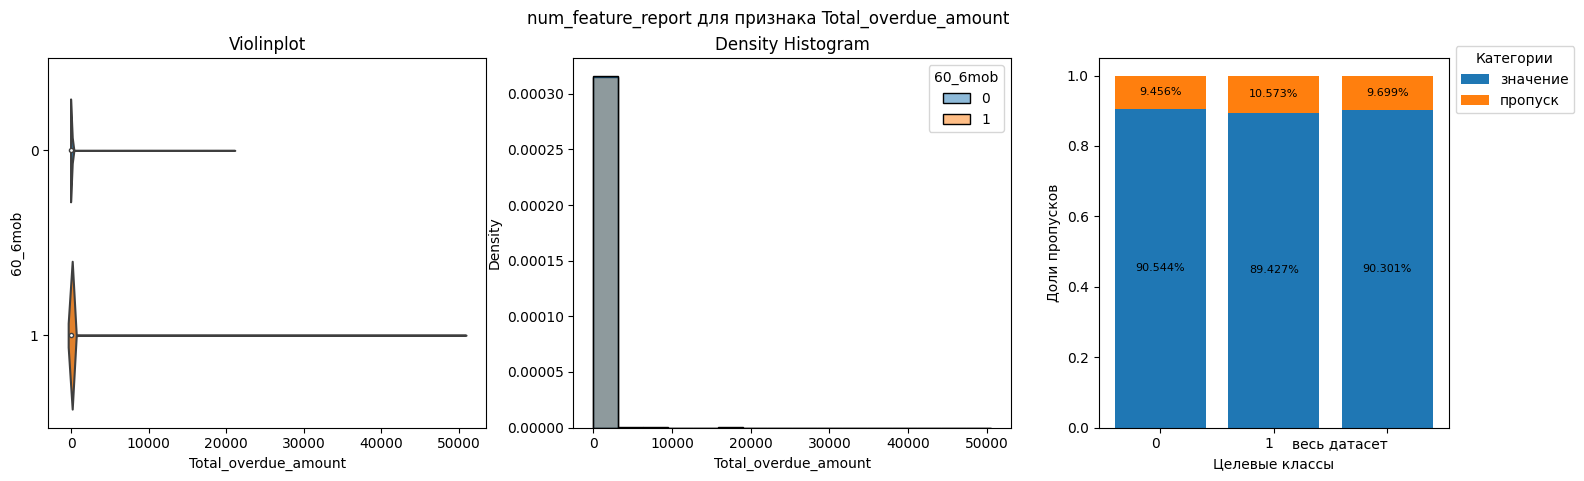

In [19]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_overdue_amount',
    target_colname='60_6mob'
)

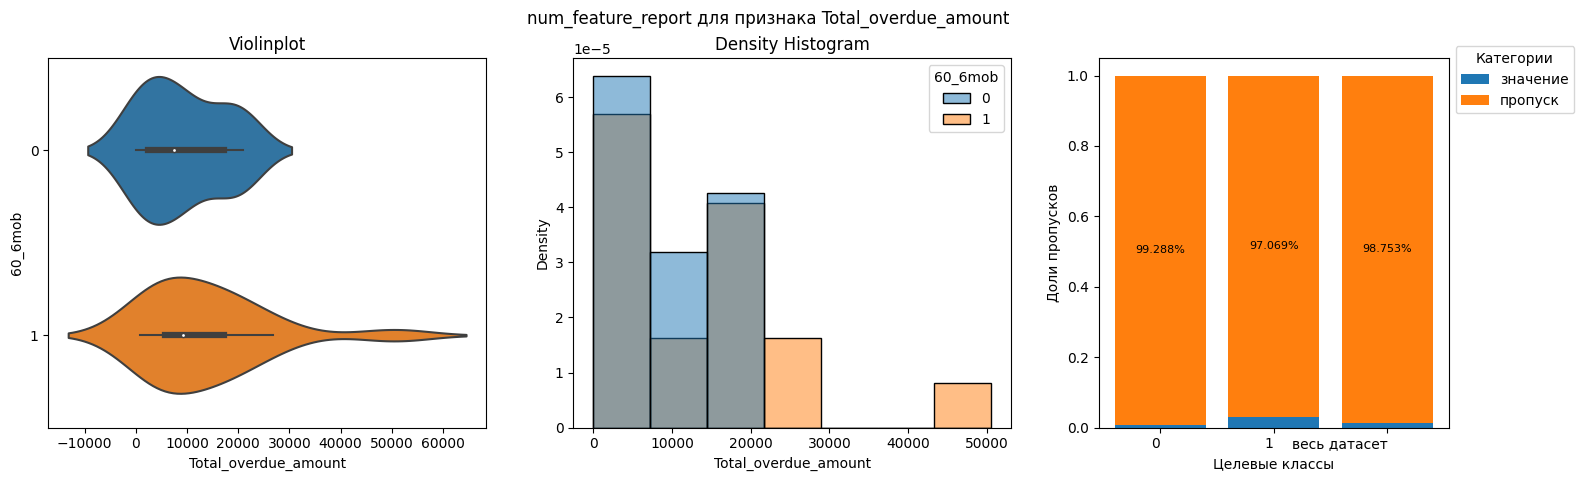

In [20]:
fig, axes = utils.eda.num_feature_report(
    nbki. query('Total_overdue_amount !=0'),
    feature_colname='Total_overdue_amount',
    target_colname='60_6mob'
)

### `Total_outstanding_amount` - Общая сумма задолженности на данный момент	

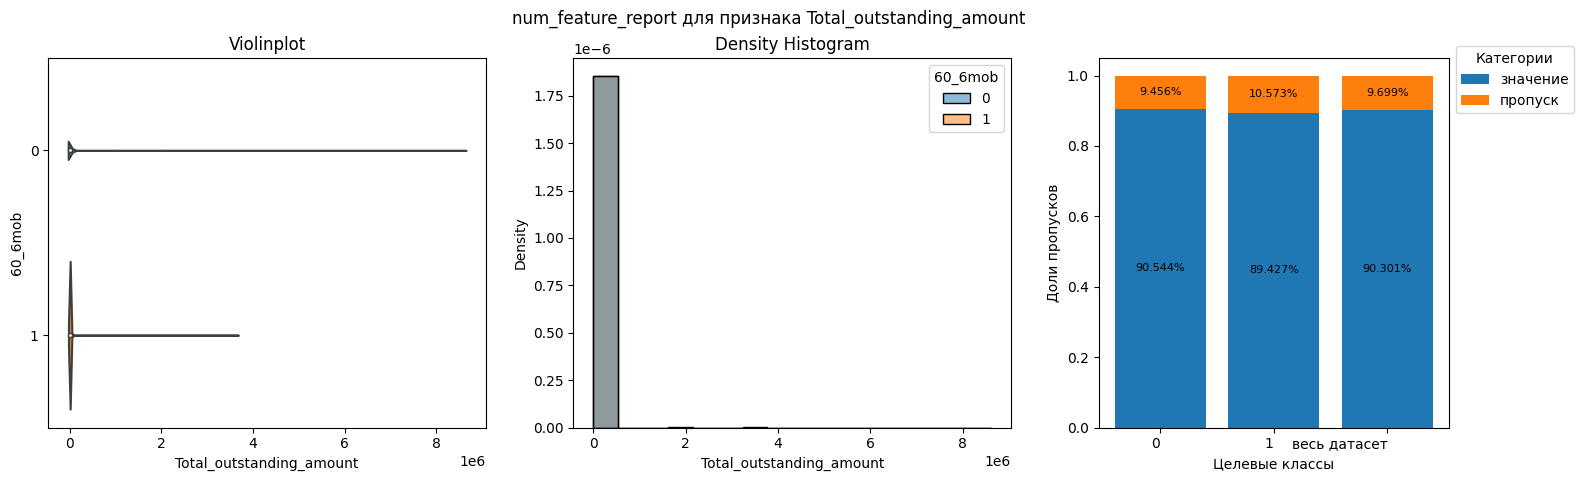

In [21]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_outstanding_amount',
    target_colname='60_6mob'
)

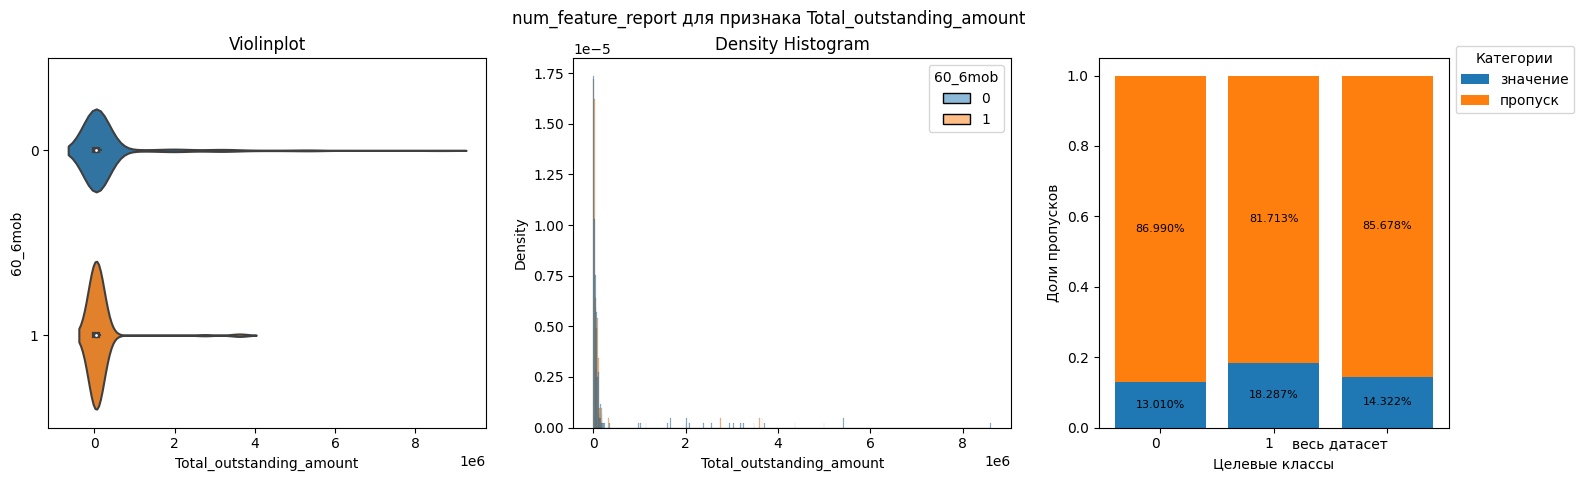

In [22]:
fig, axes = utils.eda.num_feature_report(
    nbki.query('Total_outstanding_amount != 0'),
    feature_colname='Total_outstanding_amount',
    target_colname='60_6mob'
)

### `Total_installment_amount` - Общая сумма ежемесячных платежей на данный момент	

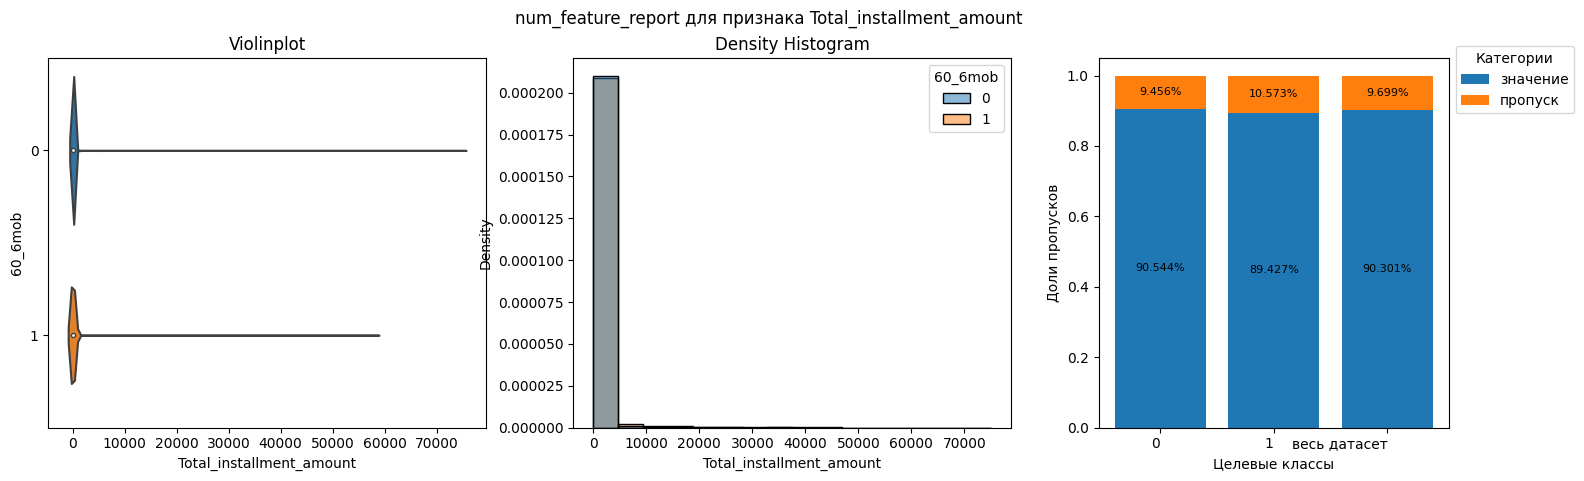

In [23]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_installment_amount',
    target_colname='60_6mob'
)

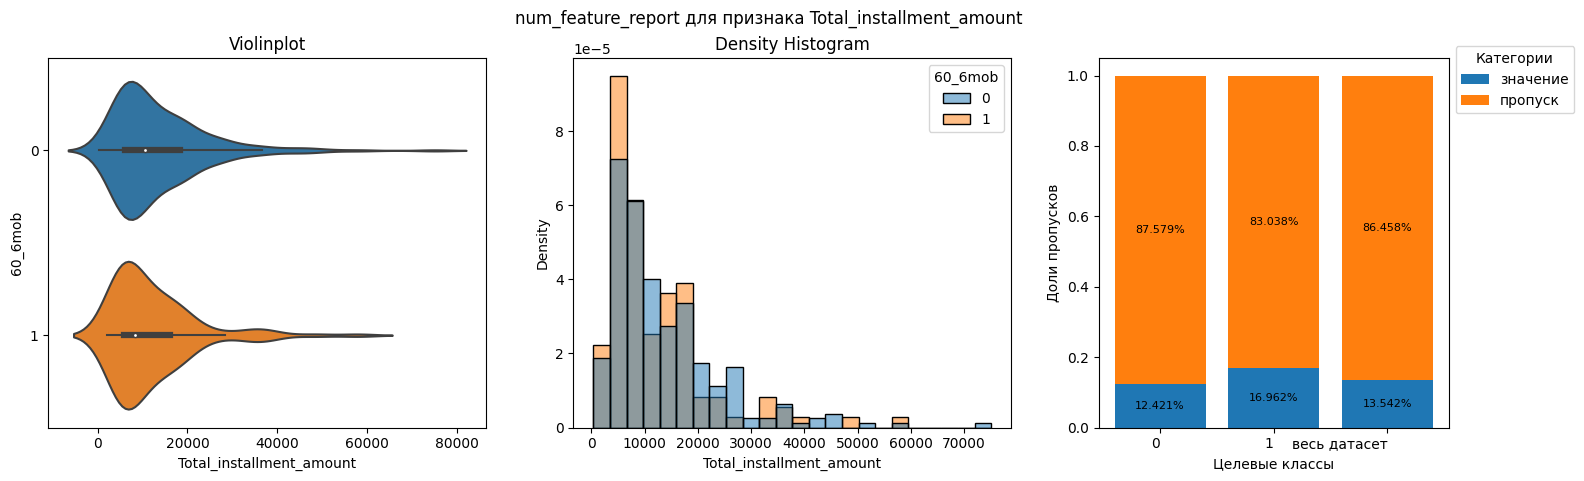

In [24]:
fig, axes = utils.eda.num_feature_report(
    nbki.query('Total_installment_amount != 0'),
    feature_colname='Total_installment_amount',
    target_colname='60_6mob'
)

### `Total_installment_amount_calc` - Сумма ежемесячных платежей по активным кредитам (кроме кред карт) + сумма кредитного лимита (для активных кред карт) * 0,1

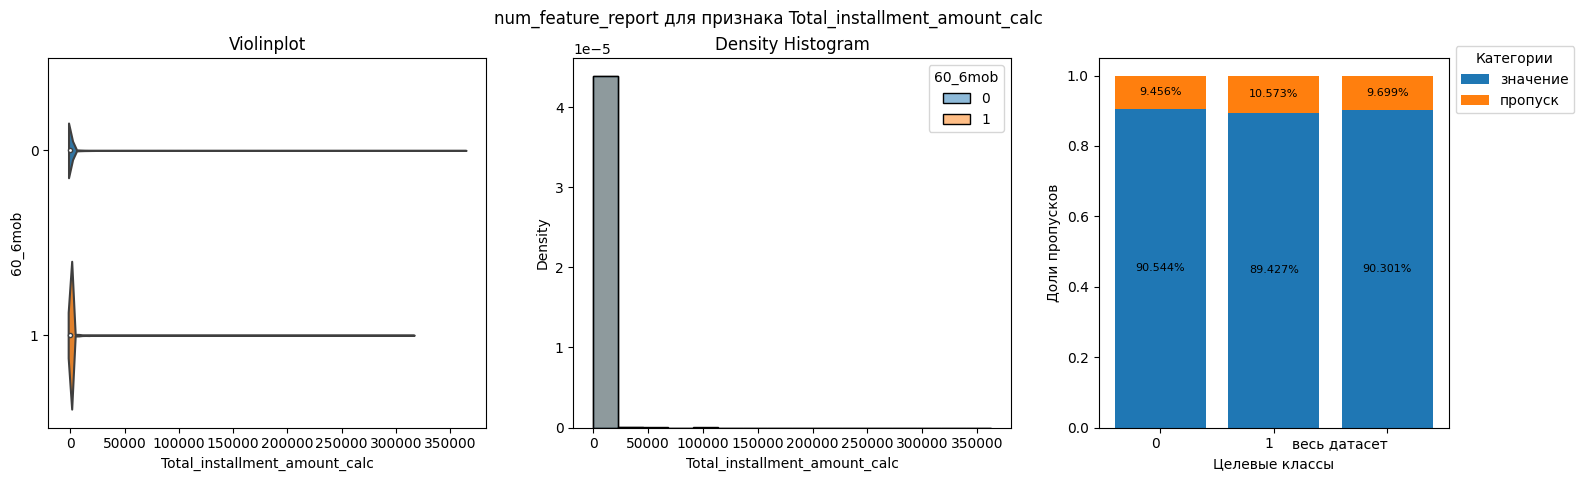

In [25]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_installment_amount_calc',
    target_colname='60_6mob'
)

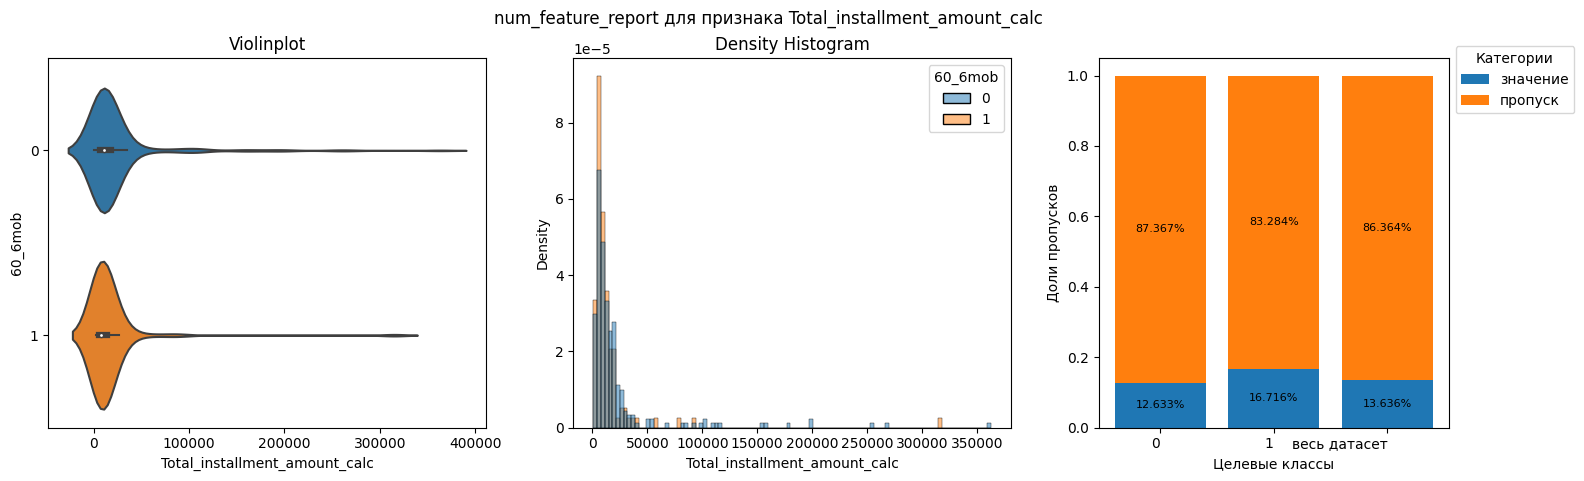

In [26]:
fig, axes = utils.eda.num_feature_report(
    nbki.query('Total_installment_amount_calc != 0'),
    feature_colname='Total_installment_amount_calc',
    target_colname='60_6mob'
)

### `Total_disputed` - Общая количество исков на клиент	

In [27]:
# константная фича
nbki['Total_disputed'].value_counts()

Total_disputed
0.0    22113
Name: count, dtype: int64

In [7]:
nbki = nbki.drop(columns='Total_disputed')

### `Total_letigation` - Общее количество взысканий с клиента	

In [29]:
# константная фича
nbki['Total_letigation'].value_counts()

Total_letigation
0.0    22113
Name: count, dtype: int64

In [8]:
nbki = nbki.drop(columns='Total_letigation')

### `Total_bankruptcy` - Общее количество банкротств	

In [31]:
# константная фича
nbki['Total_bankruptcy'].value_counts()

Total_bankruptcy
0.0    22113
Name: count, dtype: int64

In [9]:
nbki = nbki.drop(columns='Total_bankruptcy')

### `Total_inquiries` - Общее количество запросов	

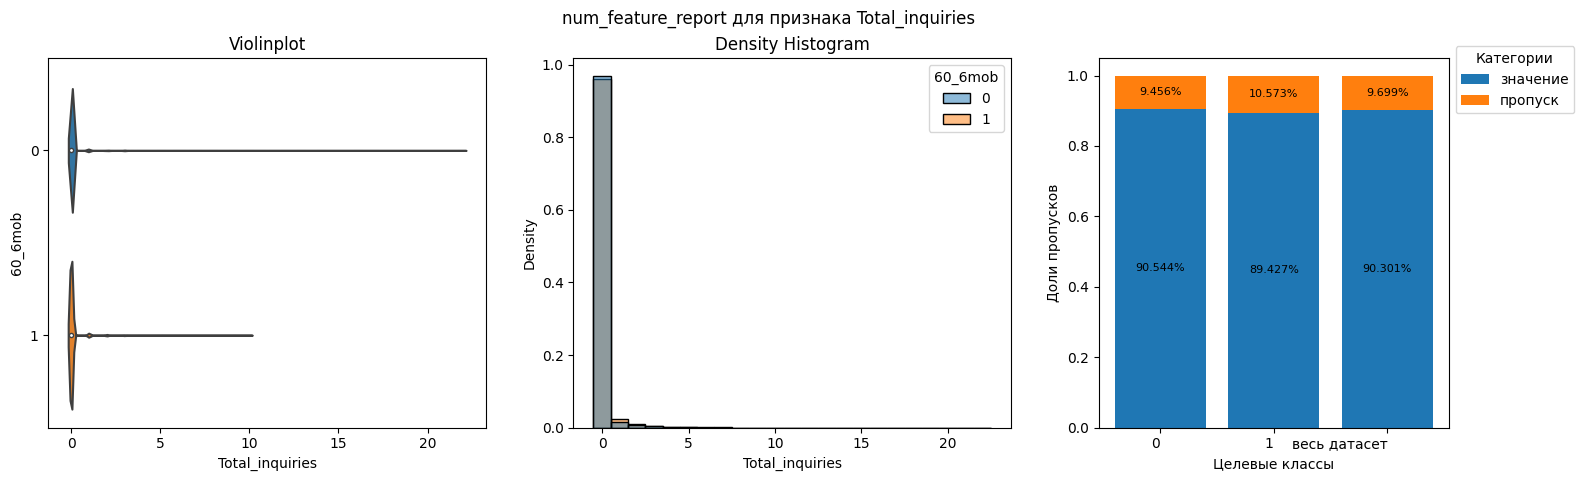

In [33]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Total_inquiries',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

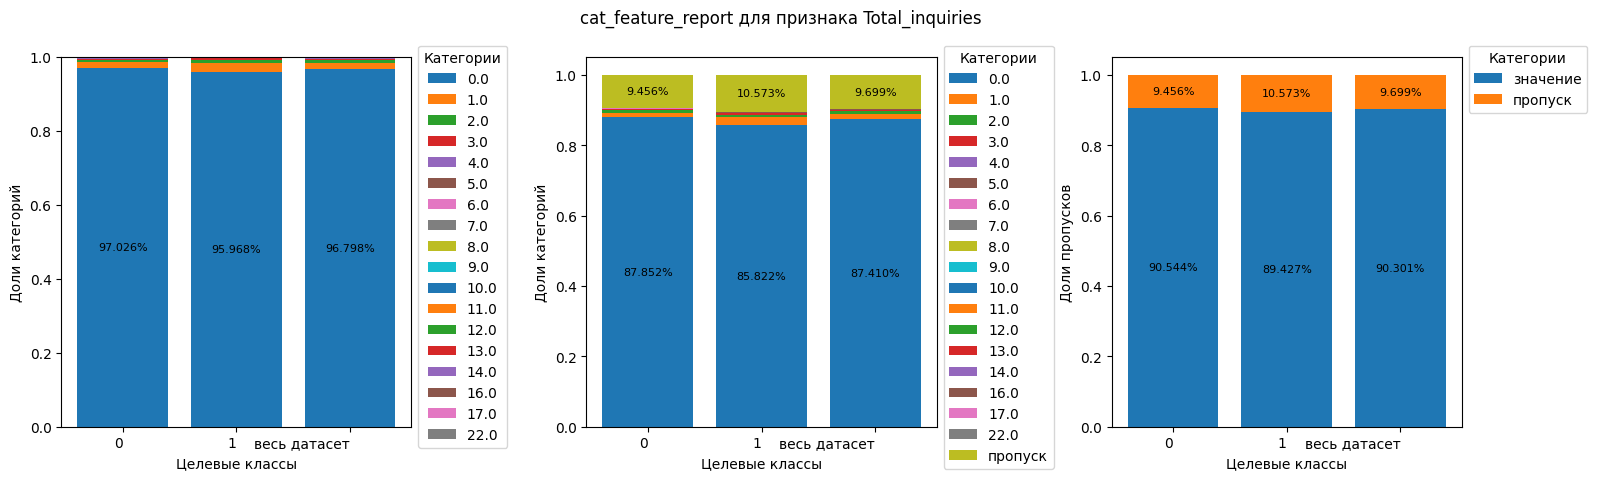

In [34]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Total_inquiries', target_colname='60_6mob')

### `Recent_inquiries` - Количество запросов за последние 30 дней

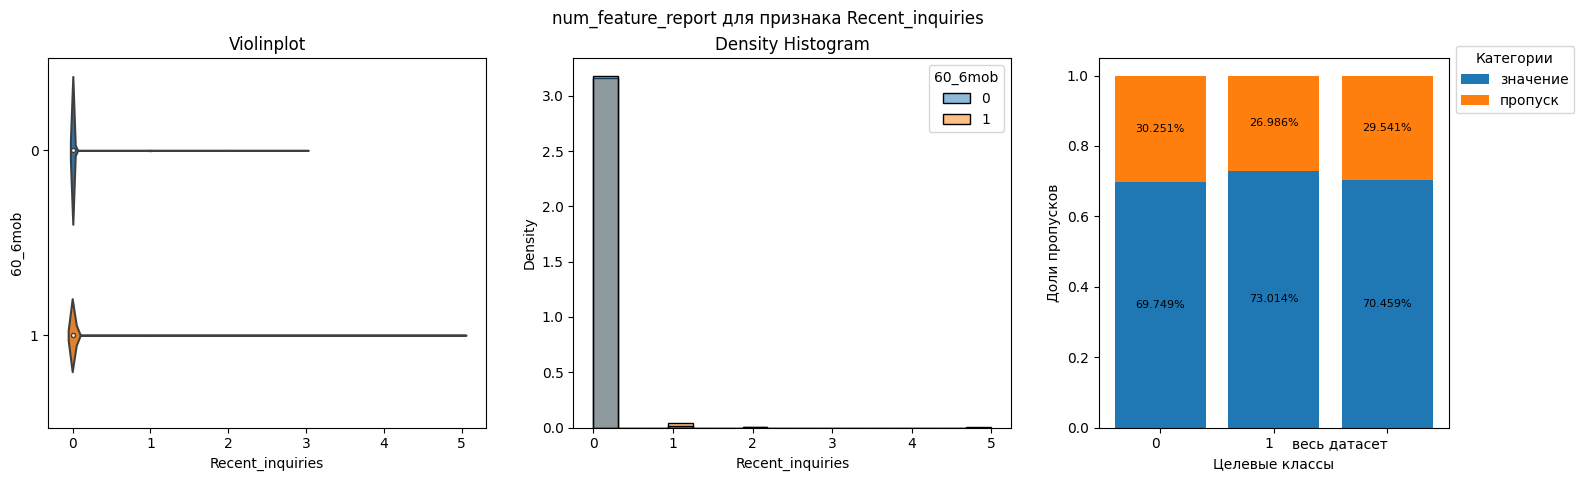

In [35]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Recent_inquiries', target_colname='60_6mob')

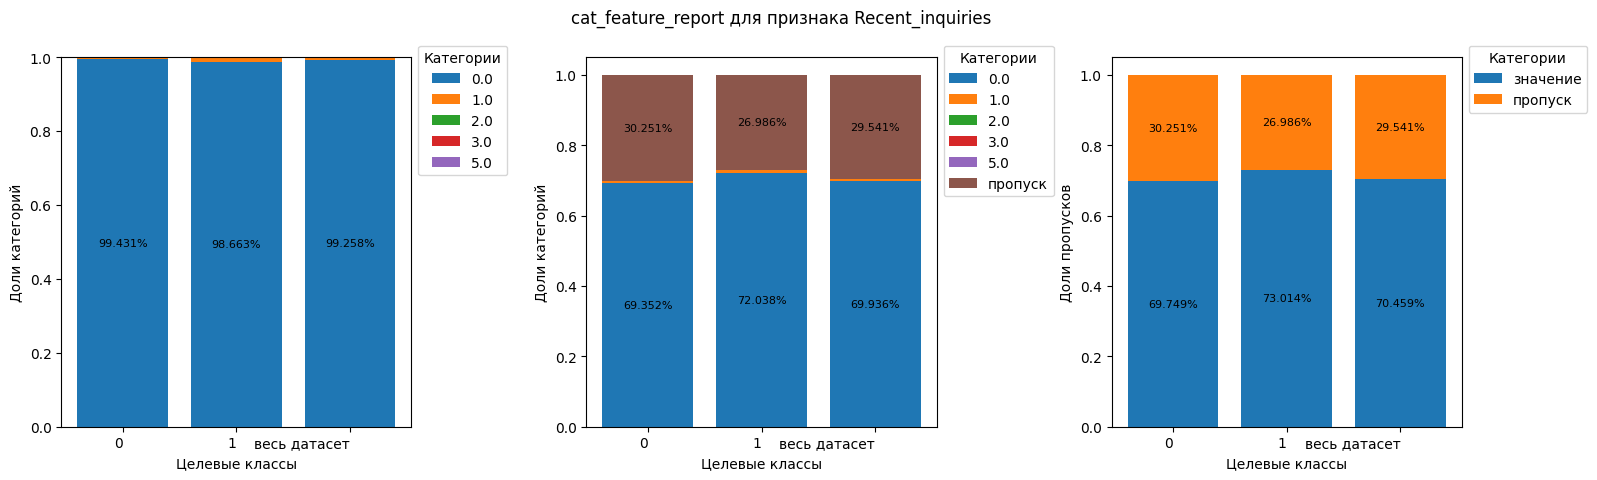

In [36]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Recent_inquiries', target_colname='60_6mob')

### `CH_length` - Длина кредитной истории	

In [10]:
nbki['CH_length'].isna().sum()

20531

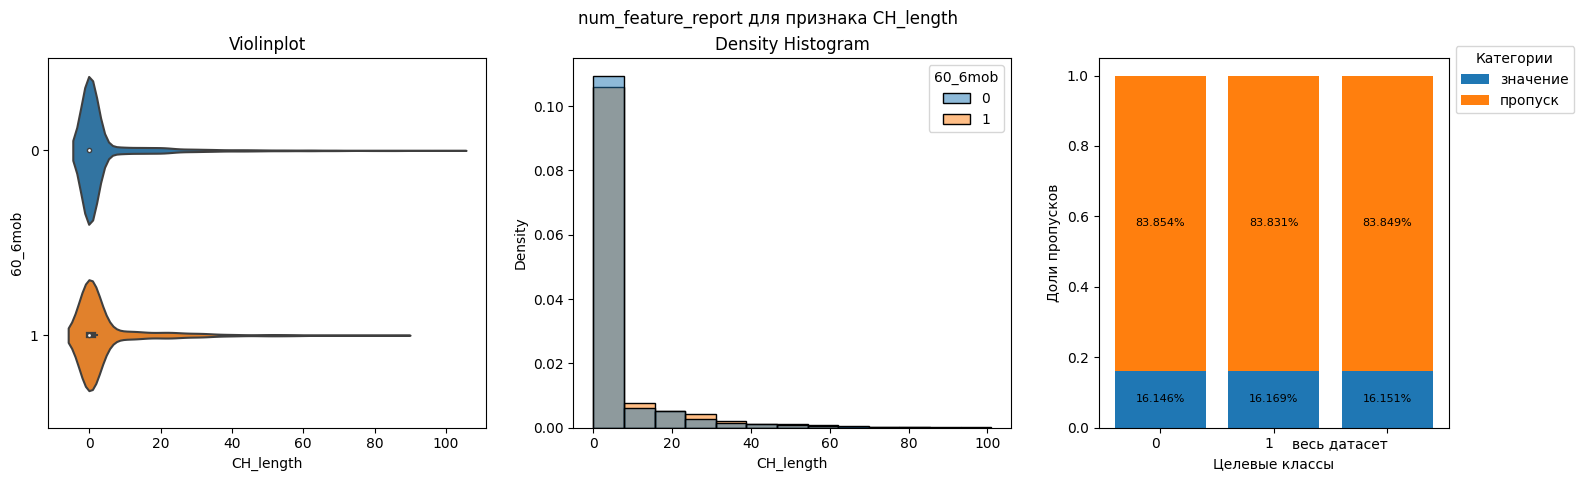

In [40]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='CH_length', target_colname='60_6mob')

In [12]:
nbki.drop(columns='CH_length', inplace=True)

### `Nb_delays_5_30_ever` - Количество просрочек платежа сроком от 5 до 30 дней за всё время	

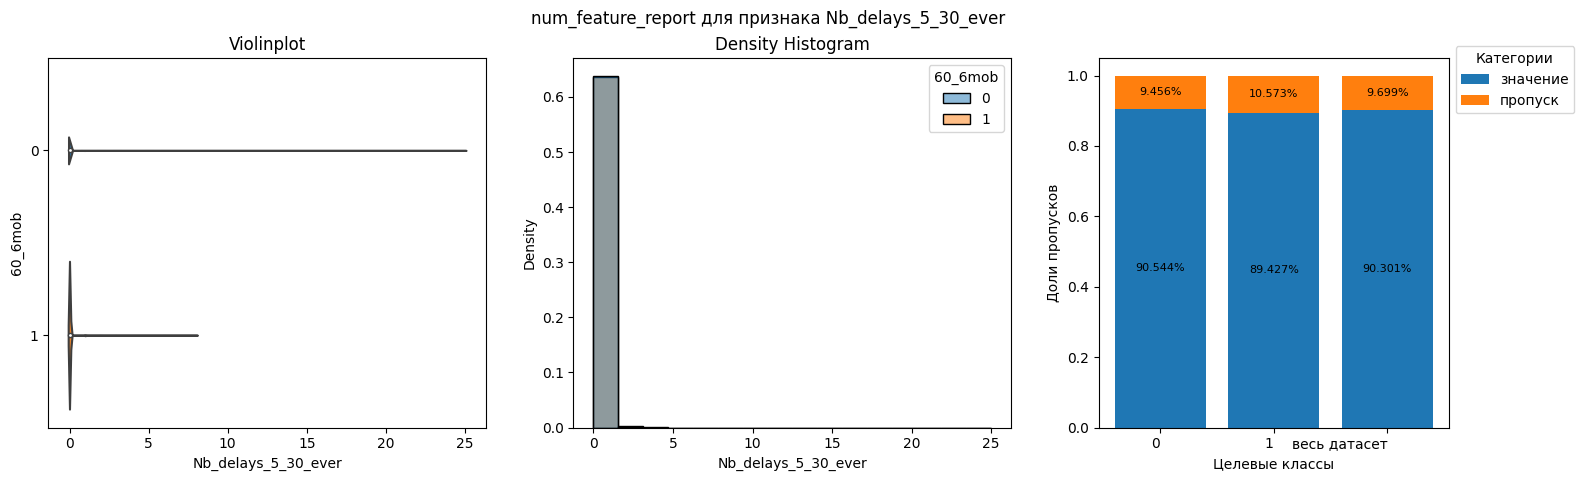

In [43]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Nb_delays_5_30_ever', target_colname='60_6mob')

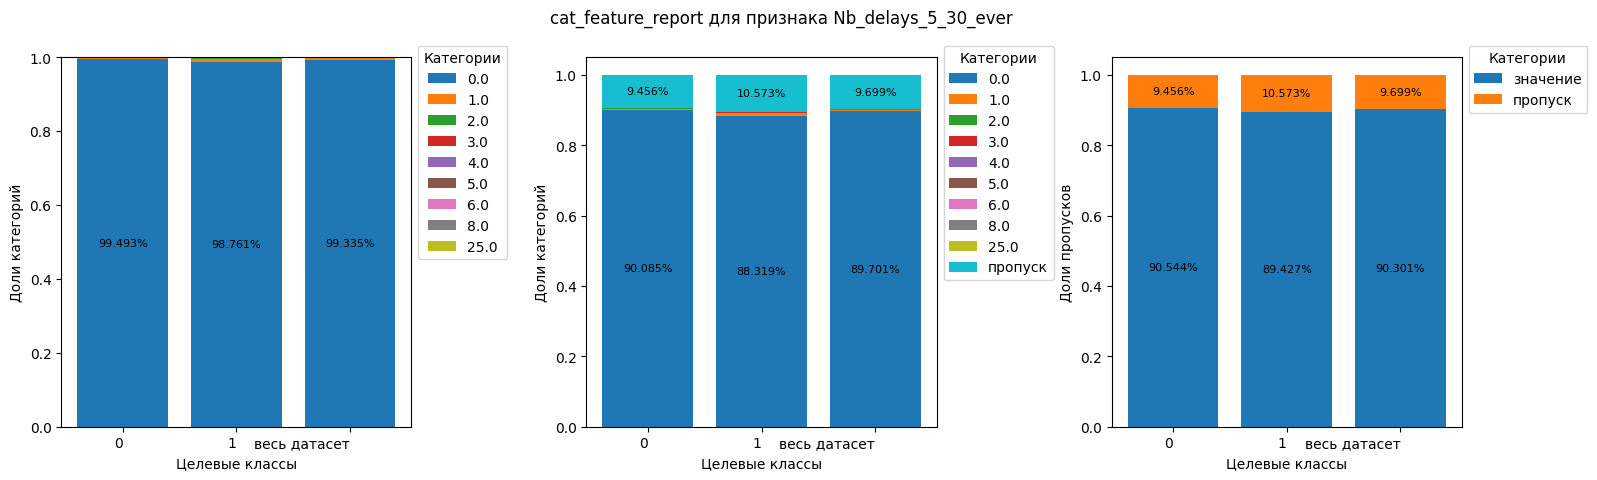

In [44]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_5_30_ever', target_colname='60_6mob')

### `Nb_delays_30_60_ever` - Количество просрочек платежа сроком от 30 до 59 дней за всё время	

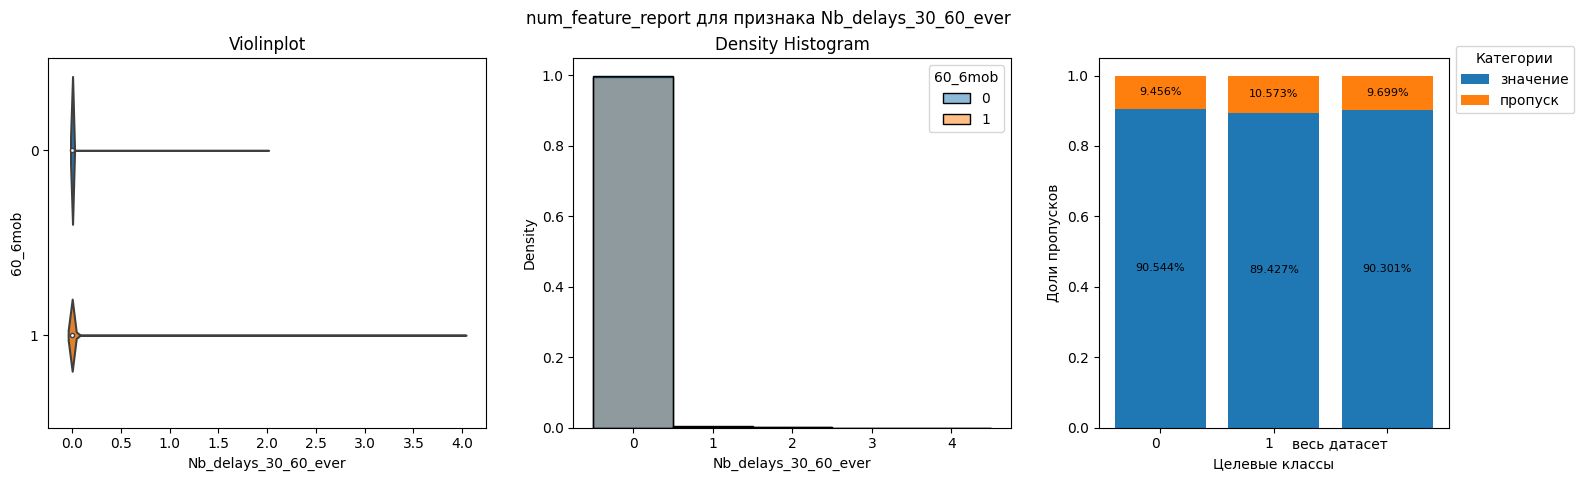

In [45]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_30_60_ever',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

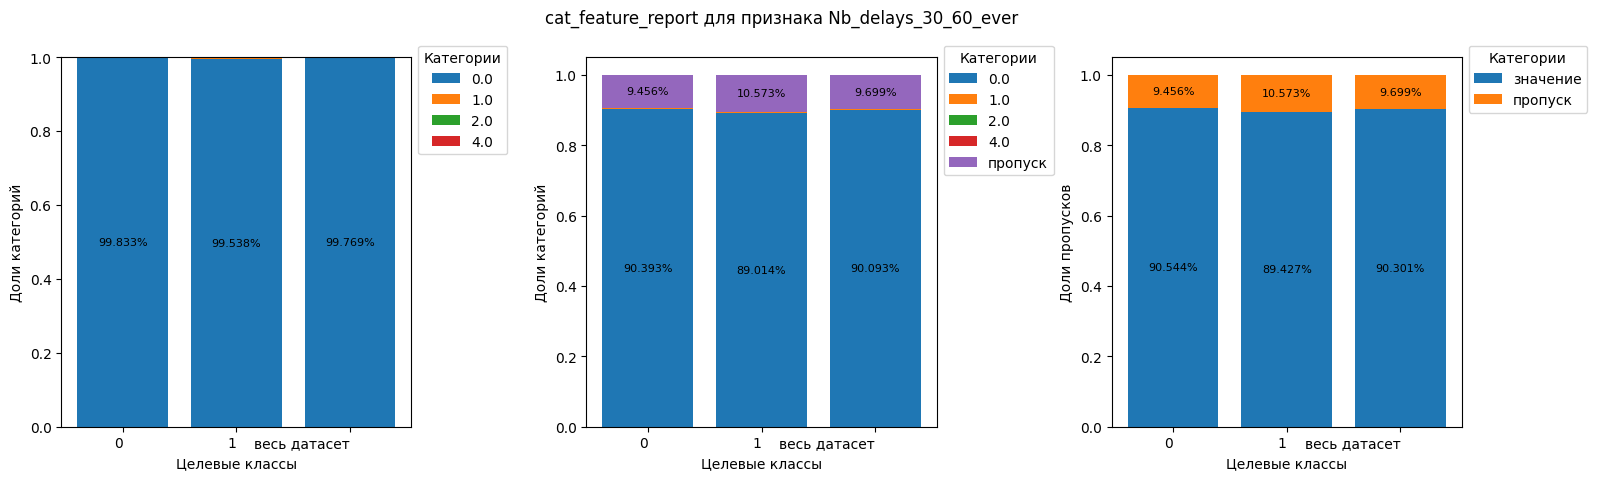

In [46]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_30_60_ever', target_colname='60_6mob')

### `Nb_delays_60_90_ever` - Количество просрочек платежа сроком от 60 до 89 дней за всё время	

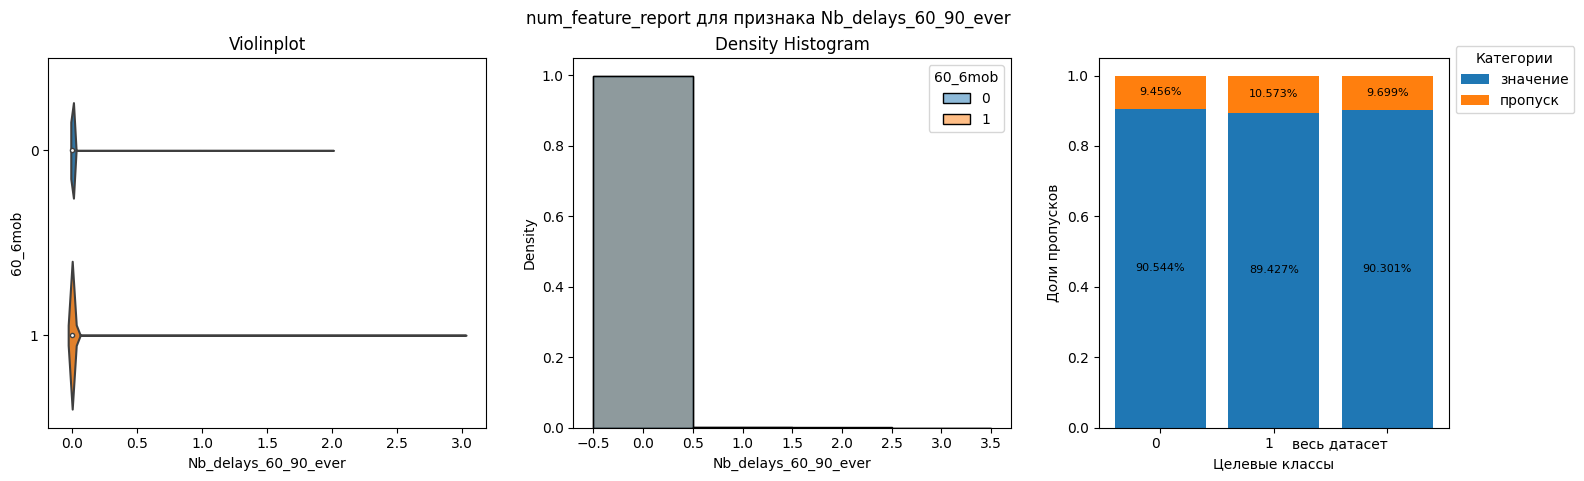

In [47]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_60_90_ever',
    target_colname='60_6mob',
    histplot_args={'discrete': True}
)

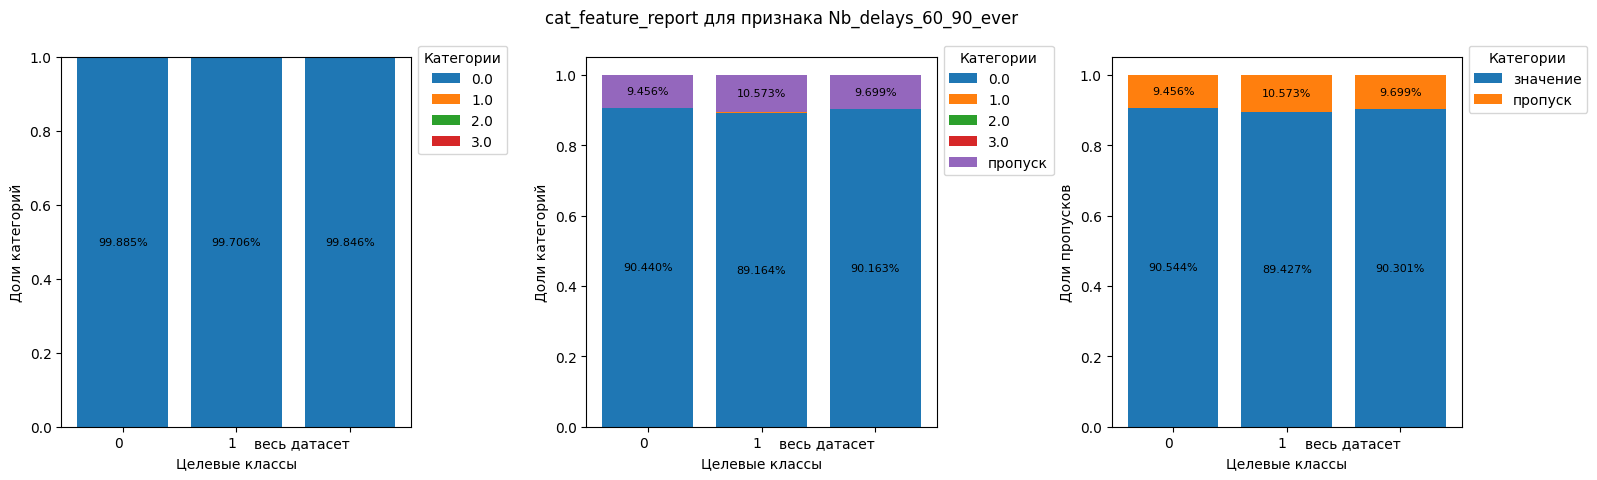

In [48]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_60_90_ever', target_colname='60_6mob')

### `Nb_delays_90_ever` - Количество просрочек платежа сроком от 90 дней за все время	

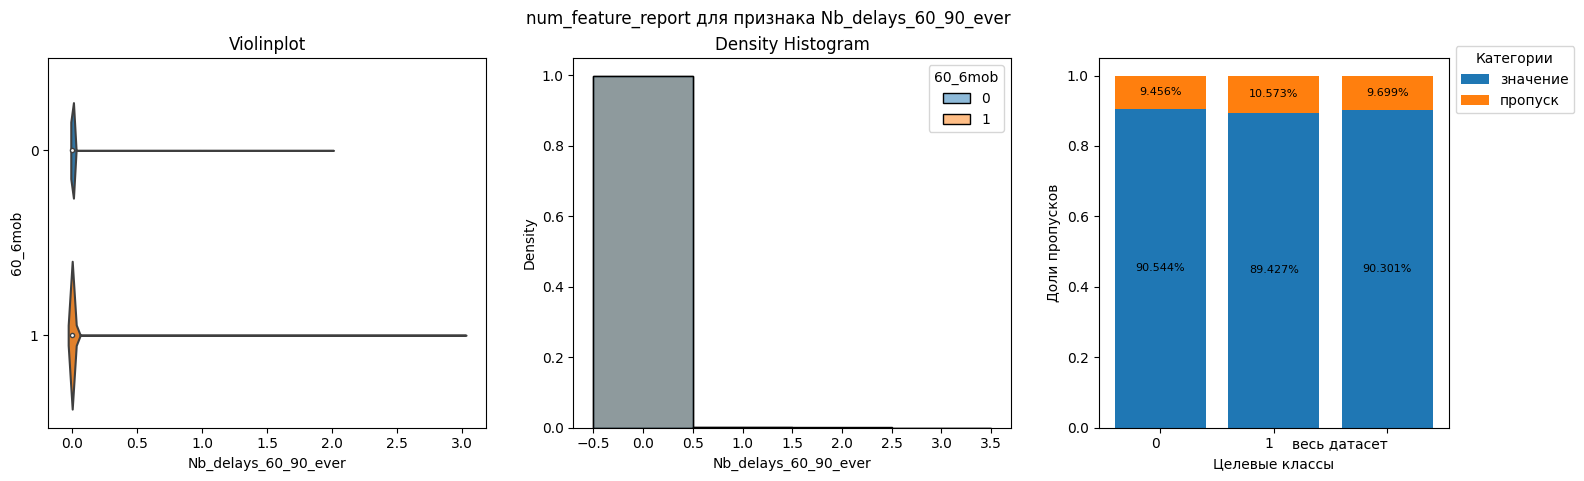

In [49]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_60_90_ever',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

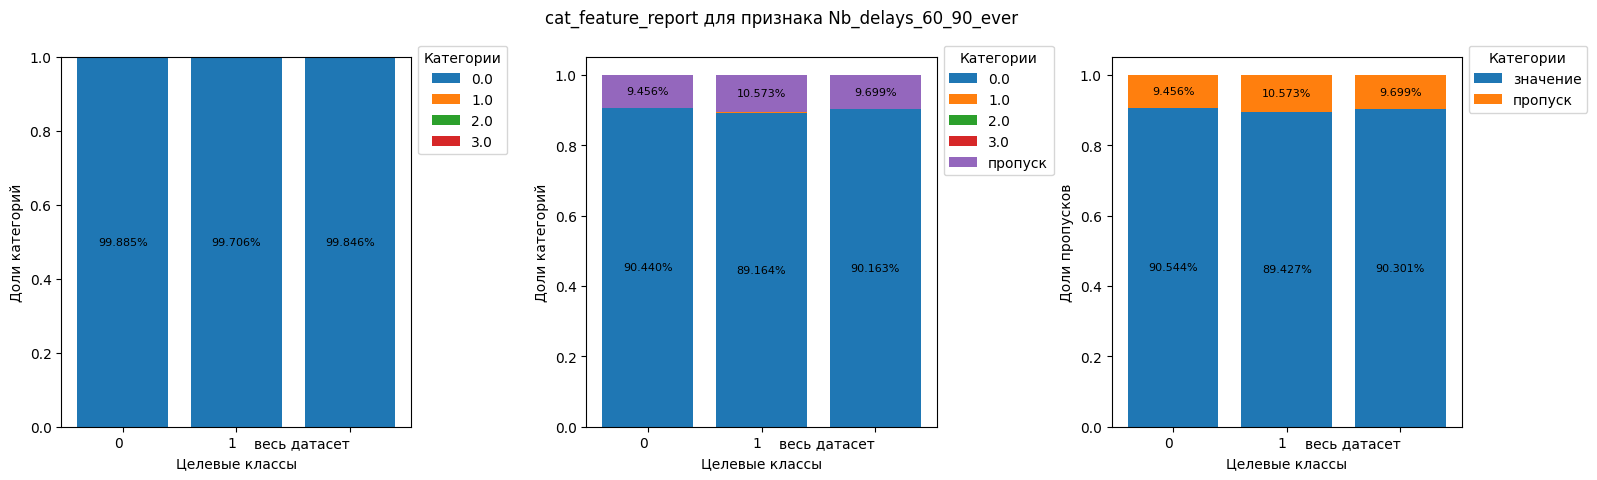

In [50]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_60_90_ever', target_colname='60_6mob')

### `Nb_delays_5_30_2y` - Количество просрочек платежа сроком от 5 до 30 дней за последние 2 года	

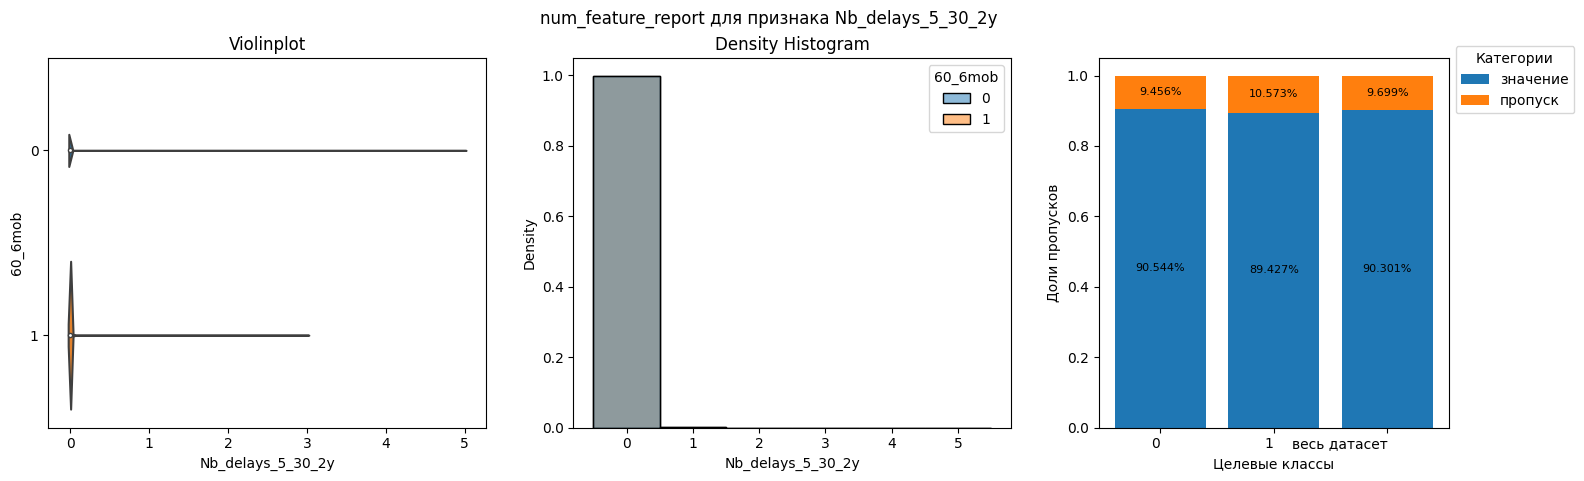

In [51]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_5_30_2y', 
    target_colname='60_6mob',
    histplot_args={'discrete': True}
)

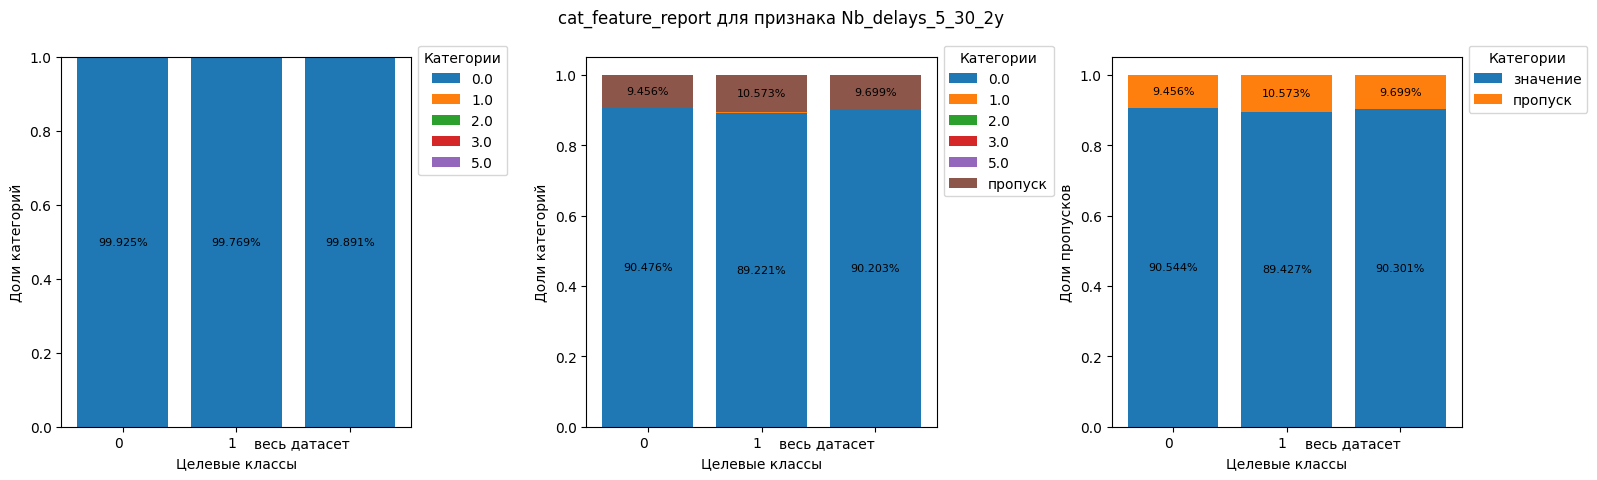

In [52]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_5_30_2y', target_colname='60_6mob')

### `Nb_delays_30_60_2y` - Количество просрочек платежа сроком от 30 до 59 дней за последние 2 года	

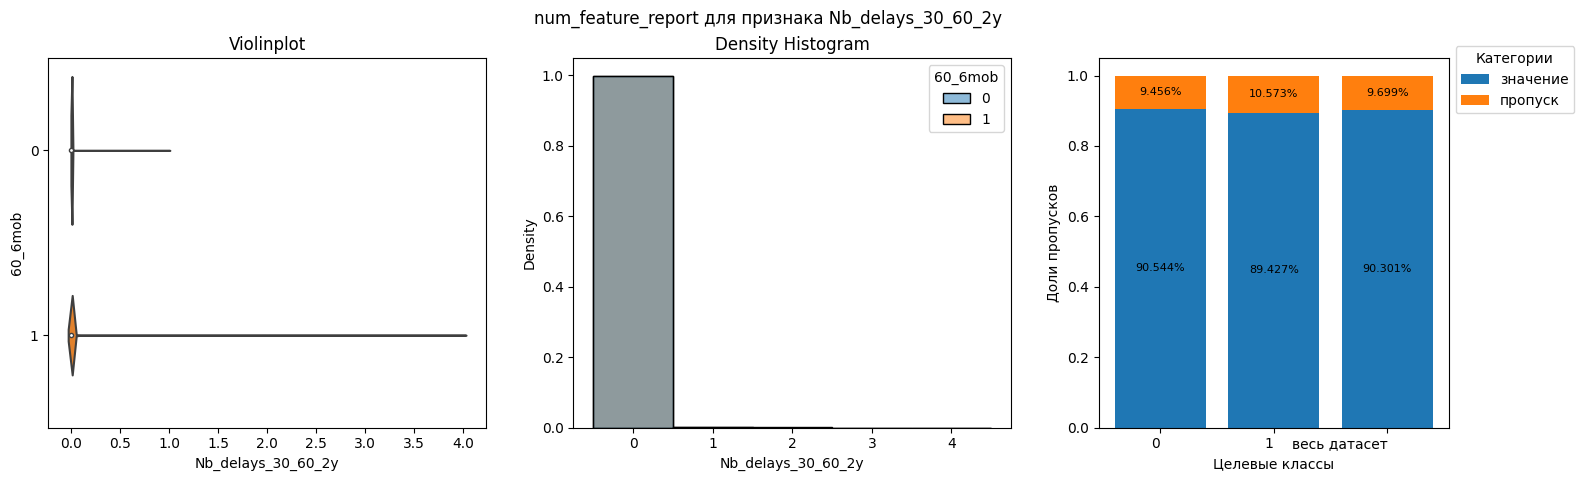

In [53]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_30_60_2y',
    target_colname='60_6mob',
    histplot_args={'discrete': True}
)

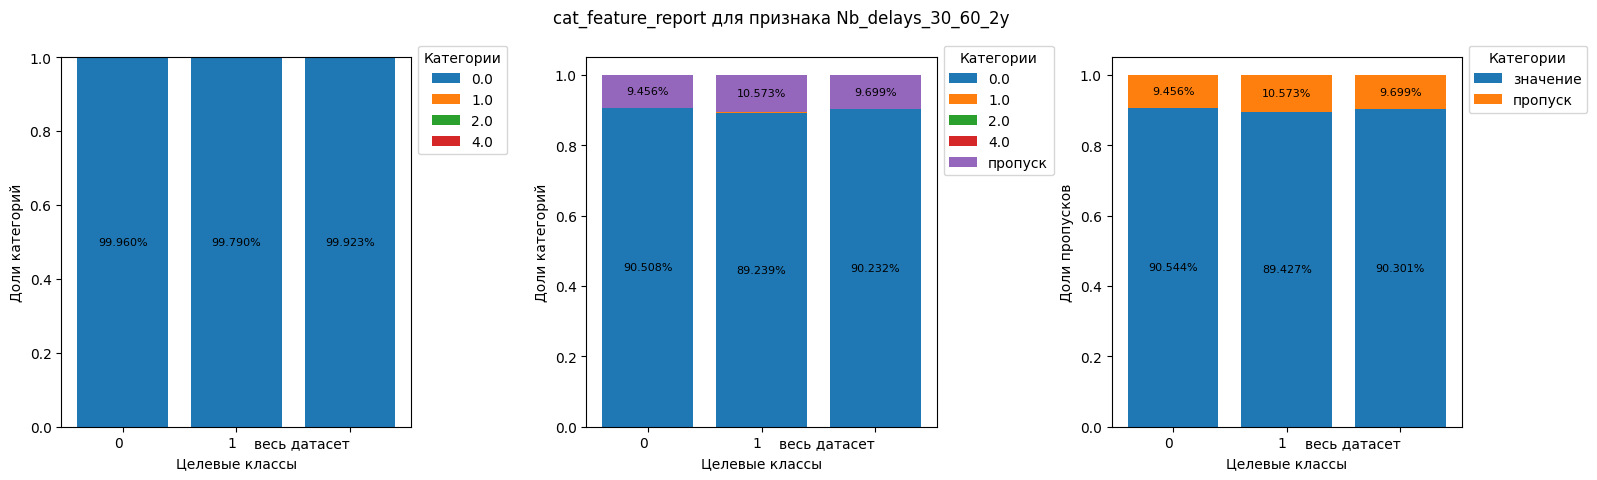

In [54]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_30_60_2y', target_colname='60_6mob')

### `Nb_delays_60_90_2y` - Количество просрочек платежа сроком от 60 до 89 дней за последние 2 года	

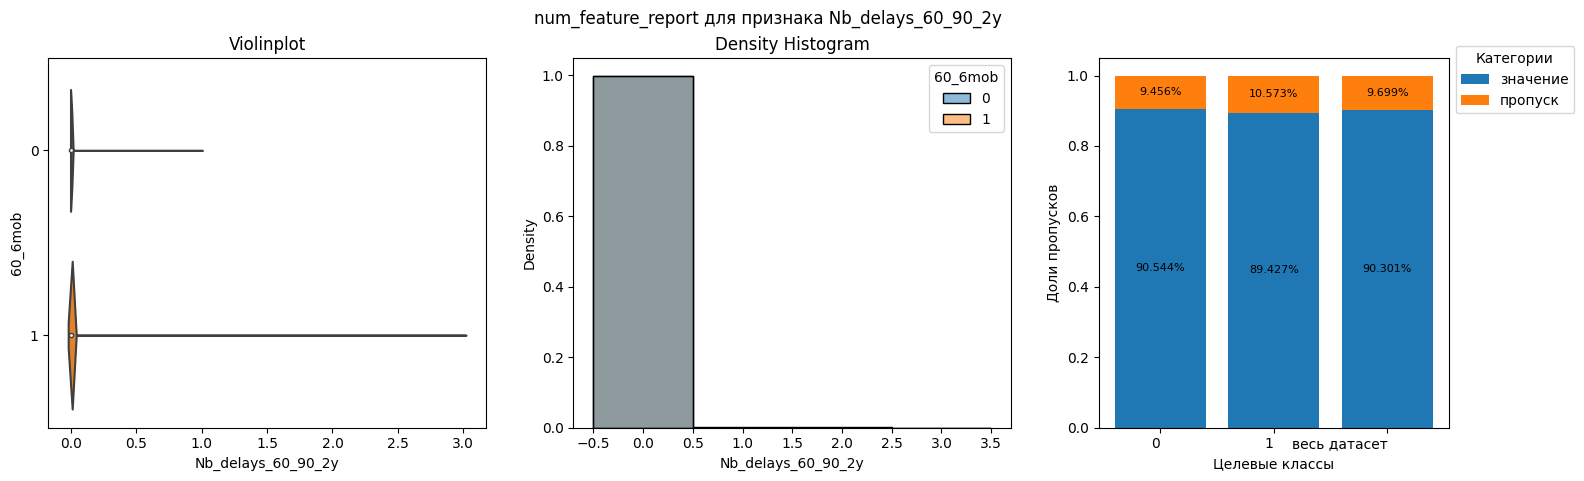

In [55]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Nb_delays_60_90_2y',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

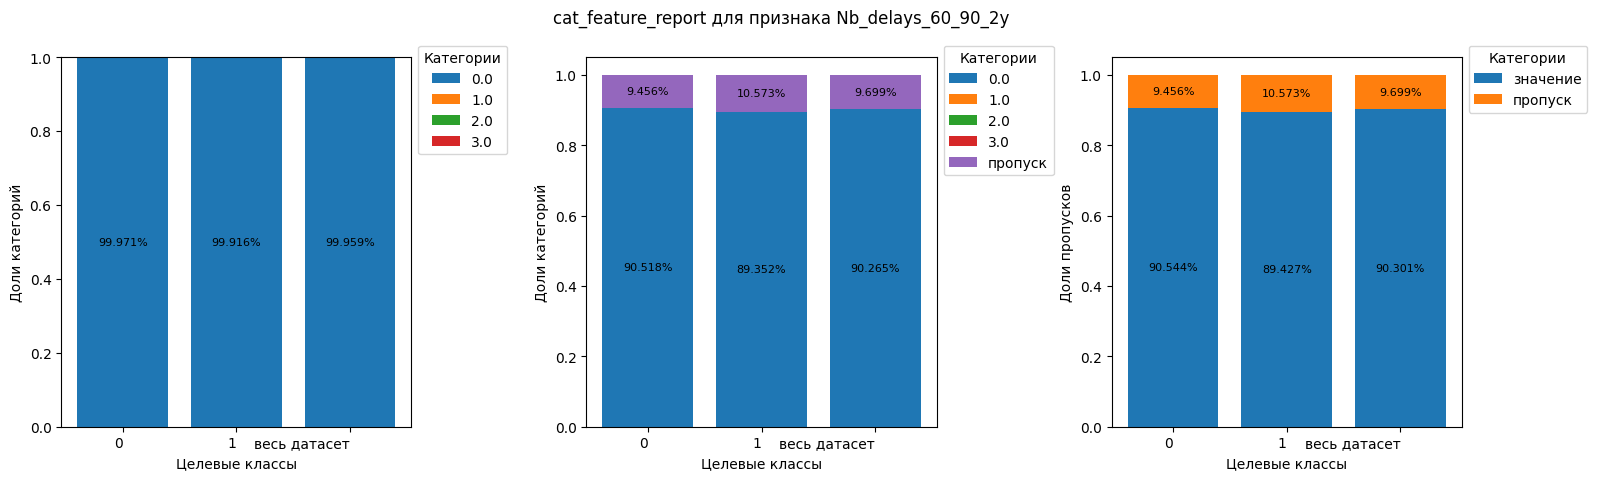

In [56]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_60_90_2y', target_colname='60_6mob')

### `Nb_delays_90_2y` - Количество просрочек платежа сроком от 90 дней за последние 2 года	

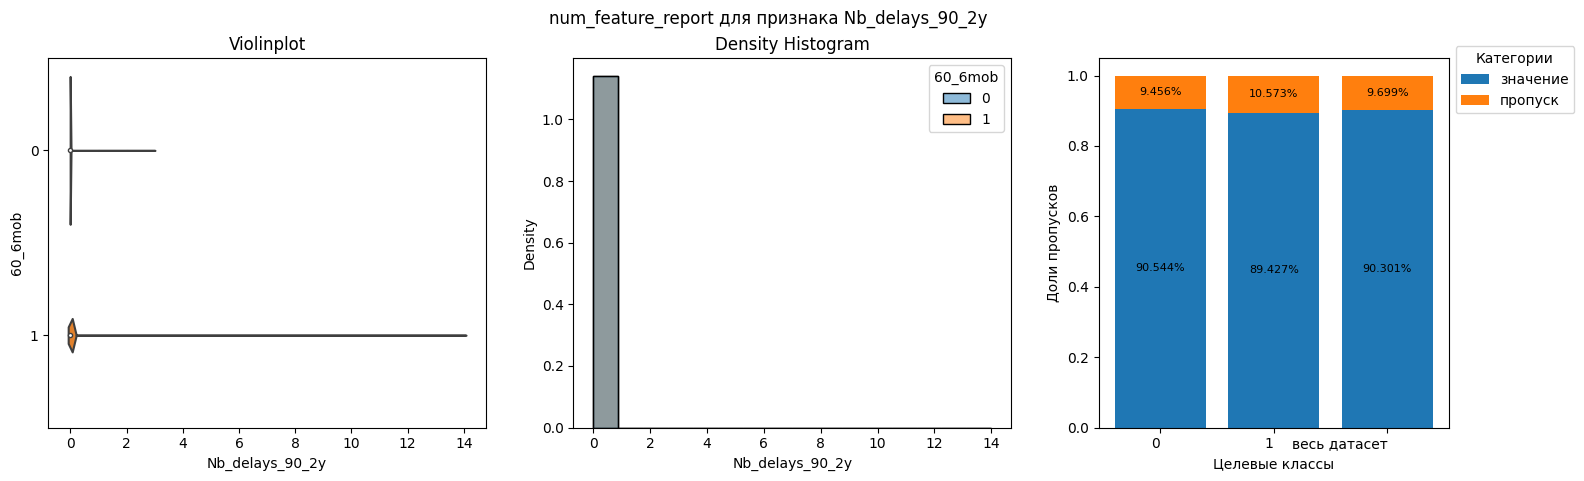

In [57]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Nb_delays_90_2y', target_colname='60_6mob')

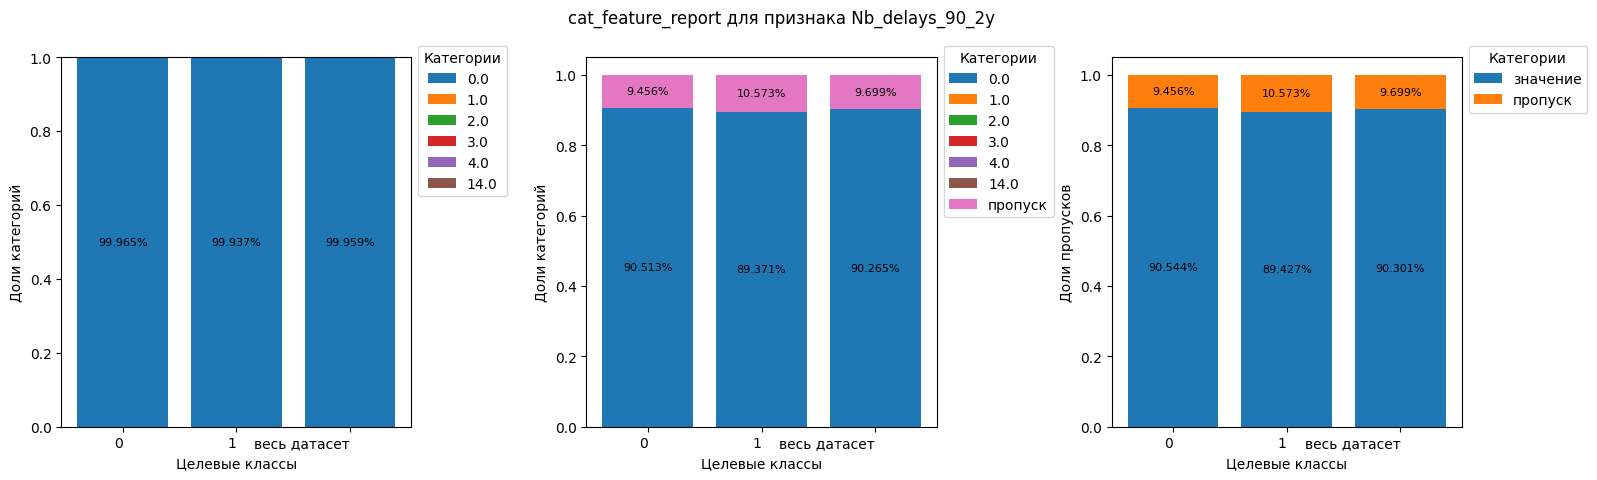

In [58]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_delays_90_2y', target_colname='60_6mob')

### `Days_since_last_credit` - Количество дней с момента последнего кредита	

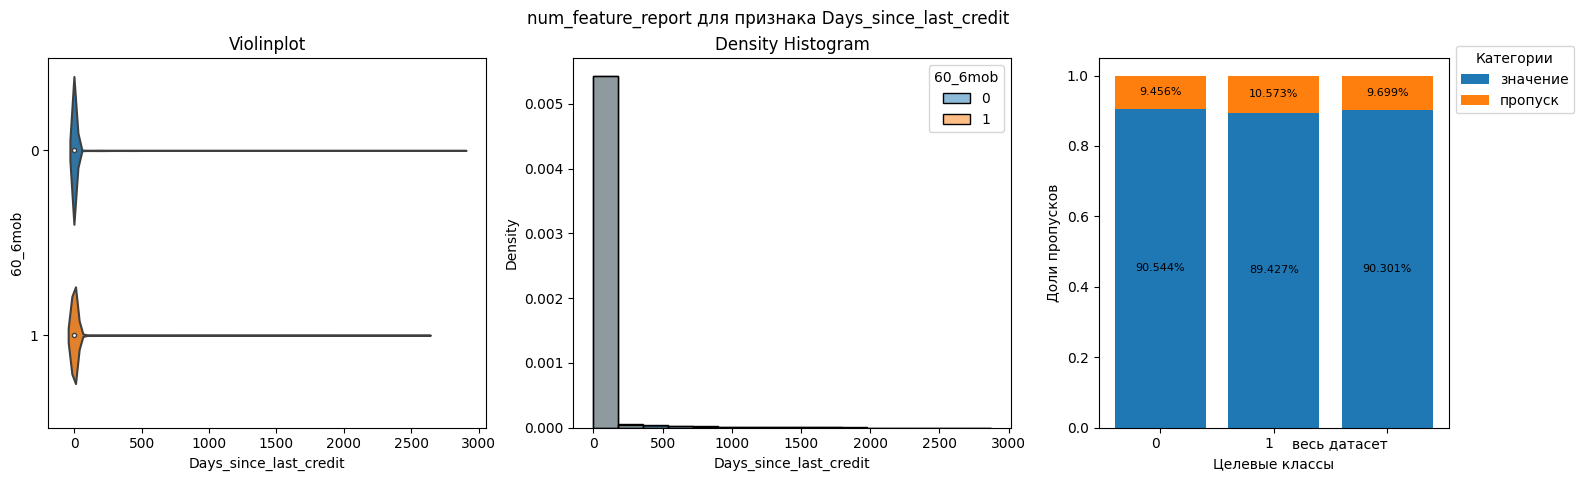

In [59]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Days_since_last_credit', target_colname='60_6mob')

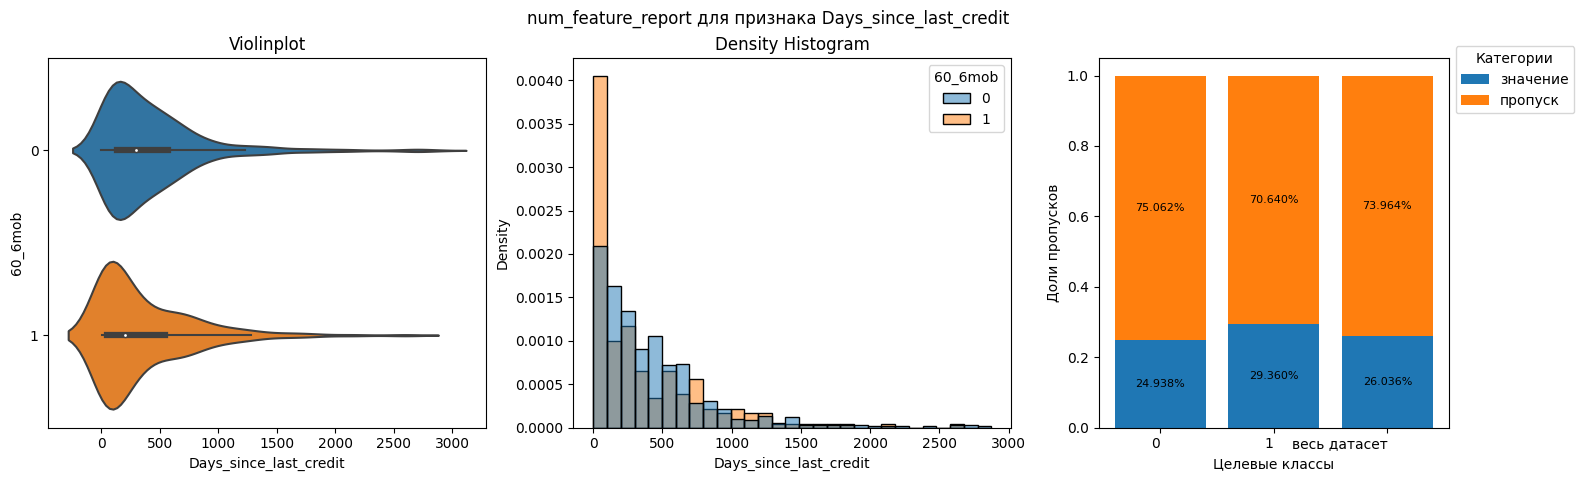

In [60]:
fig, axes = utils.eda.num_feature_report(
    nbki.query('Days_since_last_credit != 0'),
    feature_colname='Days_since_last_credit',
    target_colname='60_6mob'
)

### `Own_active_accounts_nb` - Количество собственных активных кредитов в отчете	

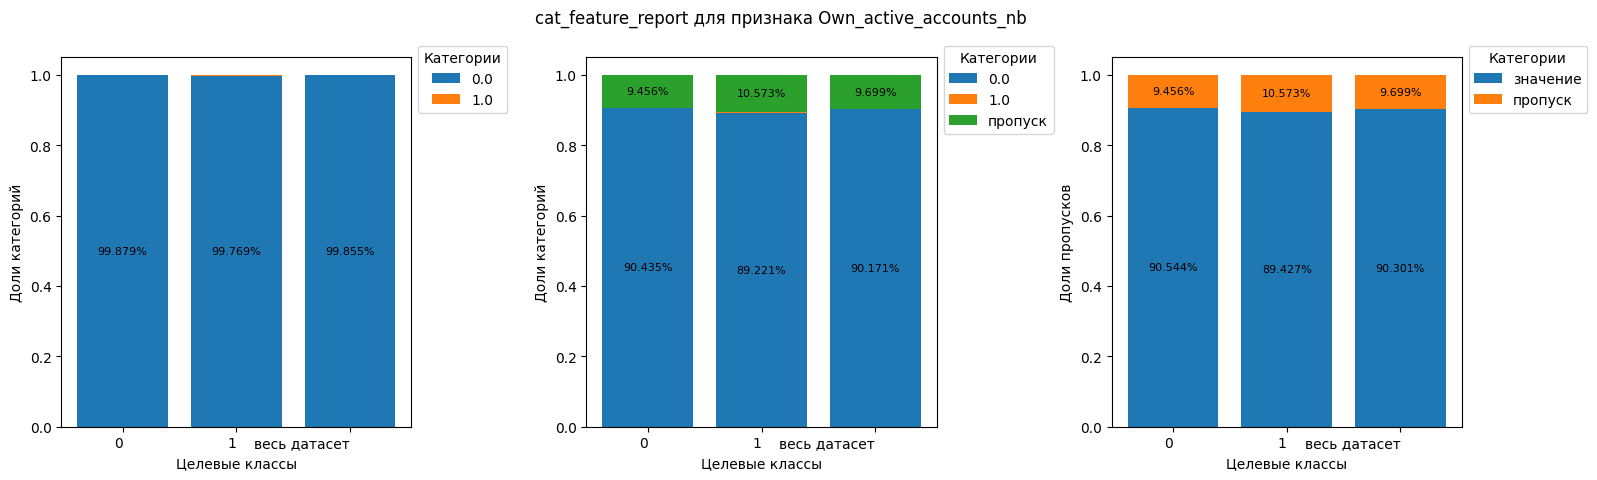

In [61]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Own_active_accounts_nb', target_colname='60_6mob')

### `Max_overdue` - Максимальная просрочка в днях	

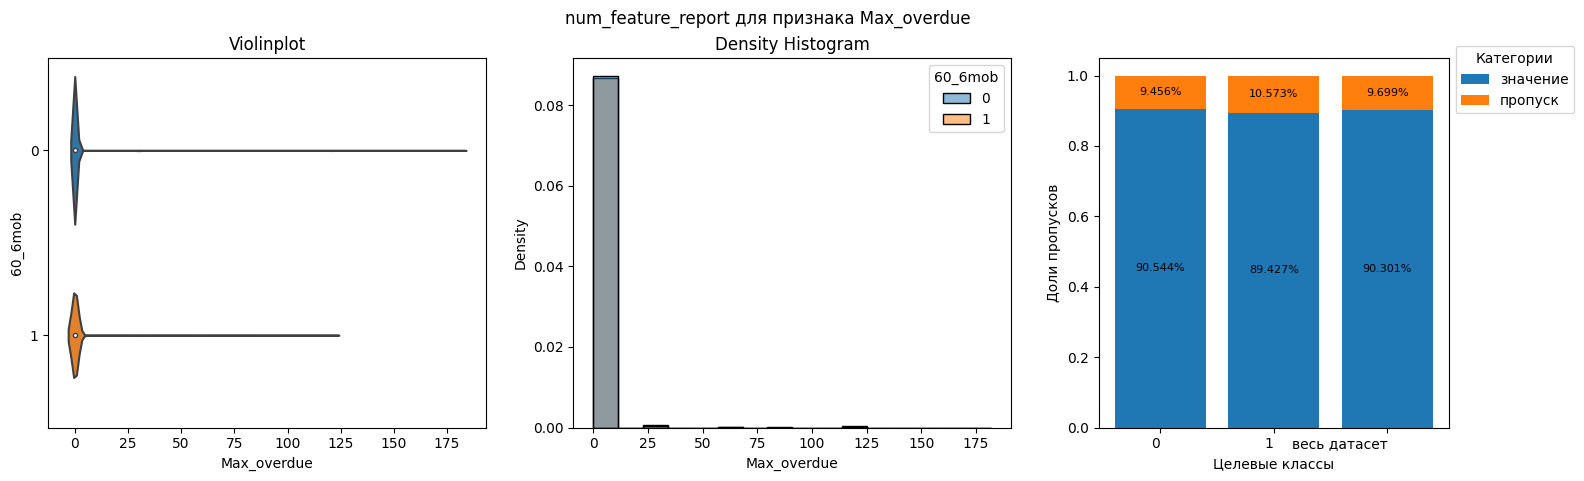

In [62]:
fig, axes = utils.eda.num_feature_report(
    nbki,
    feature_colname='Max_overdue',
    target_colname='60_6mob',
)

### `RCC_credit_limit` - Лимит по активным кредитным картам	

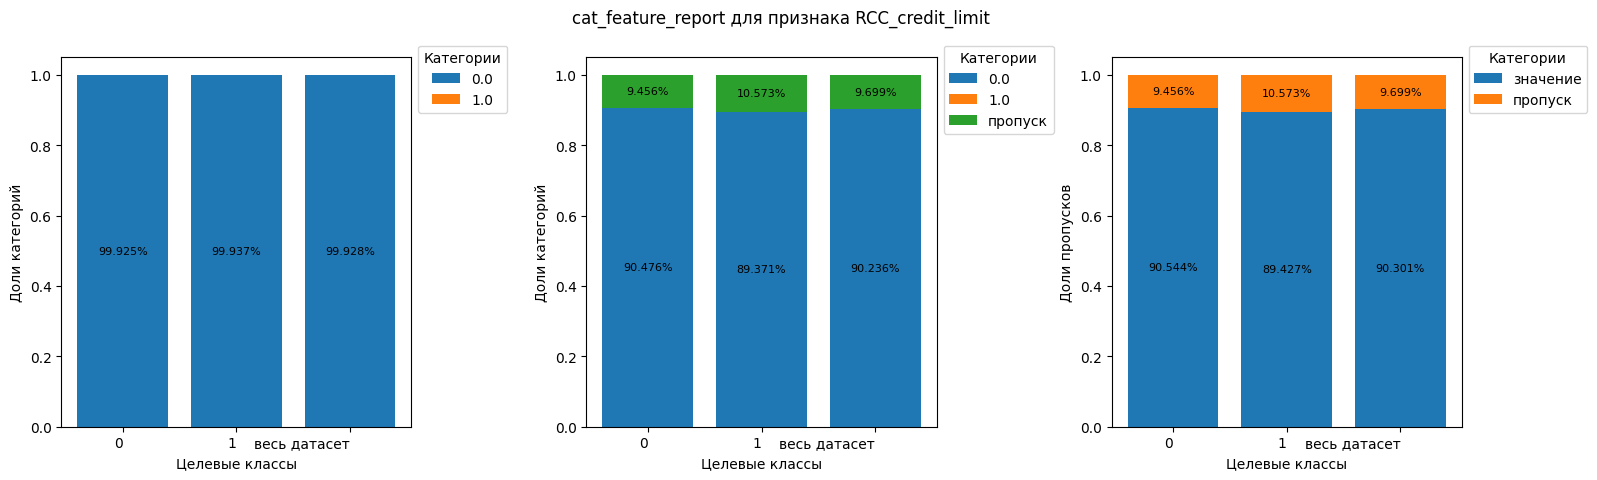

In [64]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='RCC_credit_limit', target_colname='60_6mob')

### `RCC_overdue_amount ` - Общая сумма задолженности по кредитным картам	

In [65]:
nbki['RCC_overdue_amount'].value_counts()

RCC_overdue_amount
0.0    22113
Name: count, dtype: int64

In [13]:
nbki = nbki.drop(columns=['RCC_overdue_amount'])

### `Nb_active_mortgages` - Количество активных ипотечных кредитов	

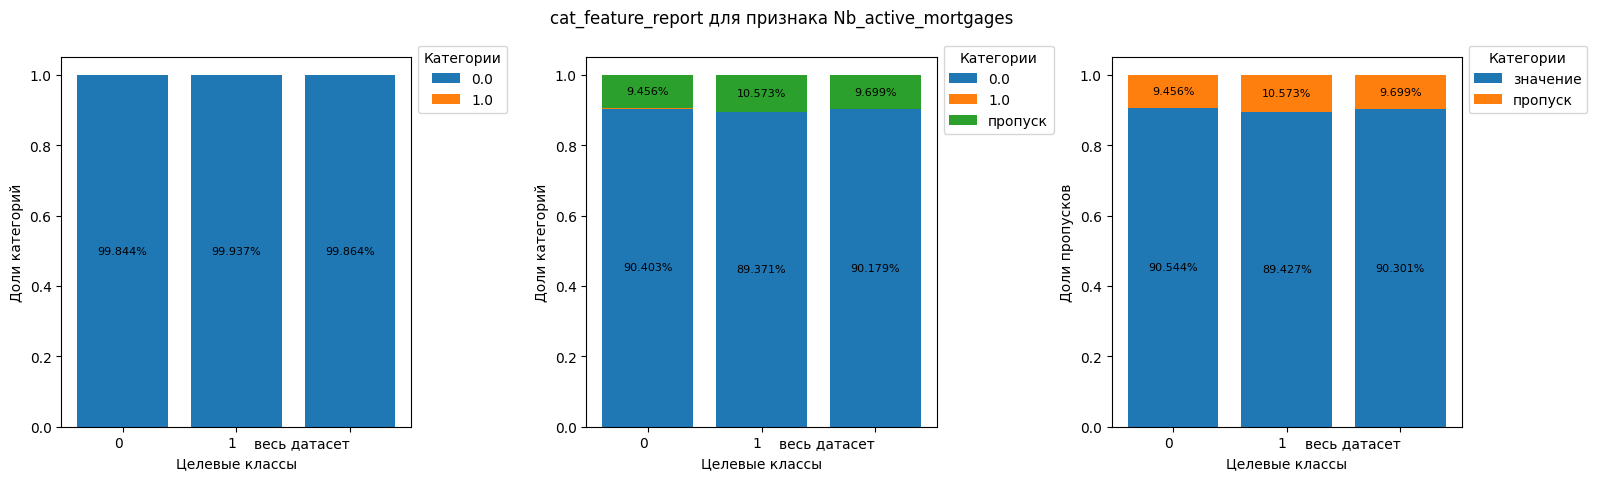

In [67]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_active_mortgages', target_colname='60_6mob')

### `Nb_active_microcredits` - Количество активных микрокредитов	

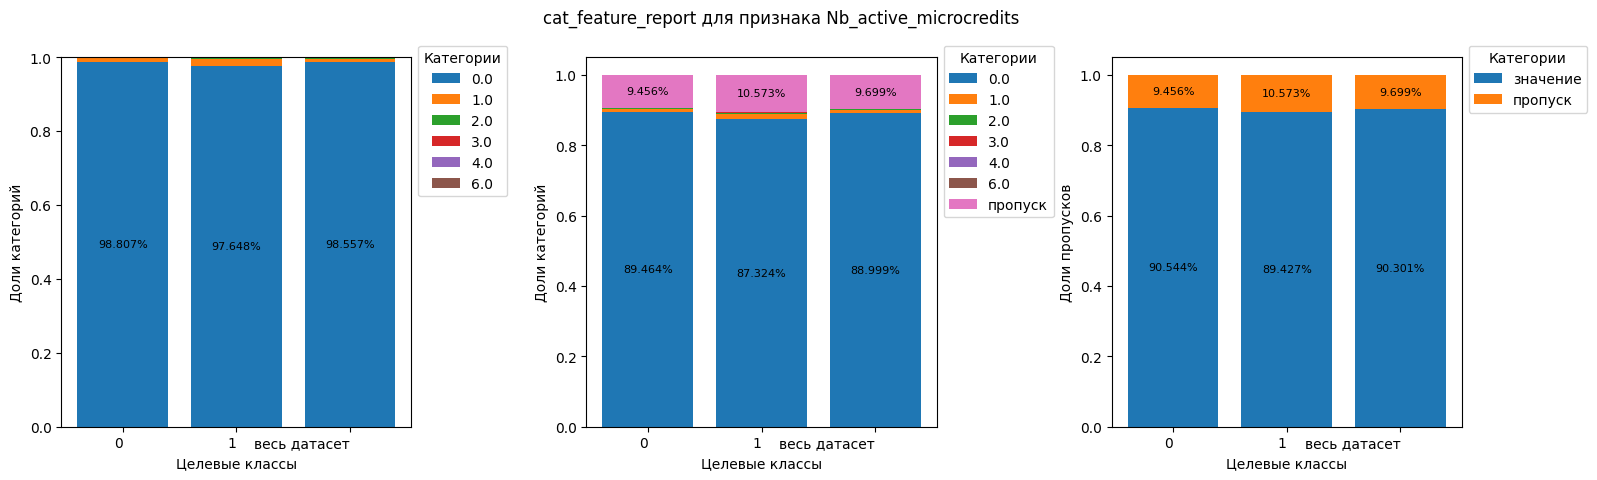

In [68]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_active_microcredits', target_colname='60_6mob')

### `Total_mortgages` - Количество ипотечных кредитов	

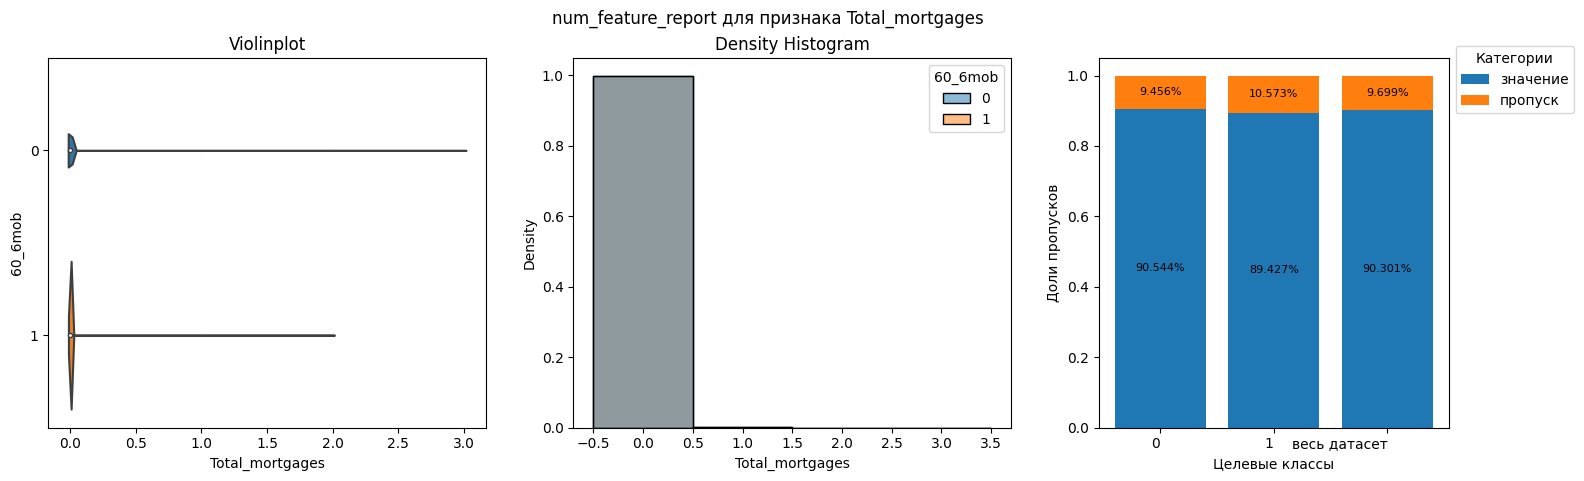

In [69]:
fig, axes = utils.eda.num_feature_report(
    nbki, 
    feature_colname='Total_mortgages', 
    target_colname='60_6mob',
    histplot_args={'discrete': True}
)

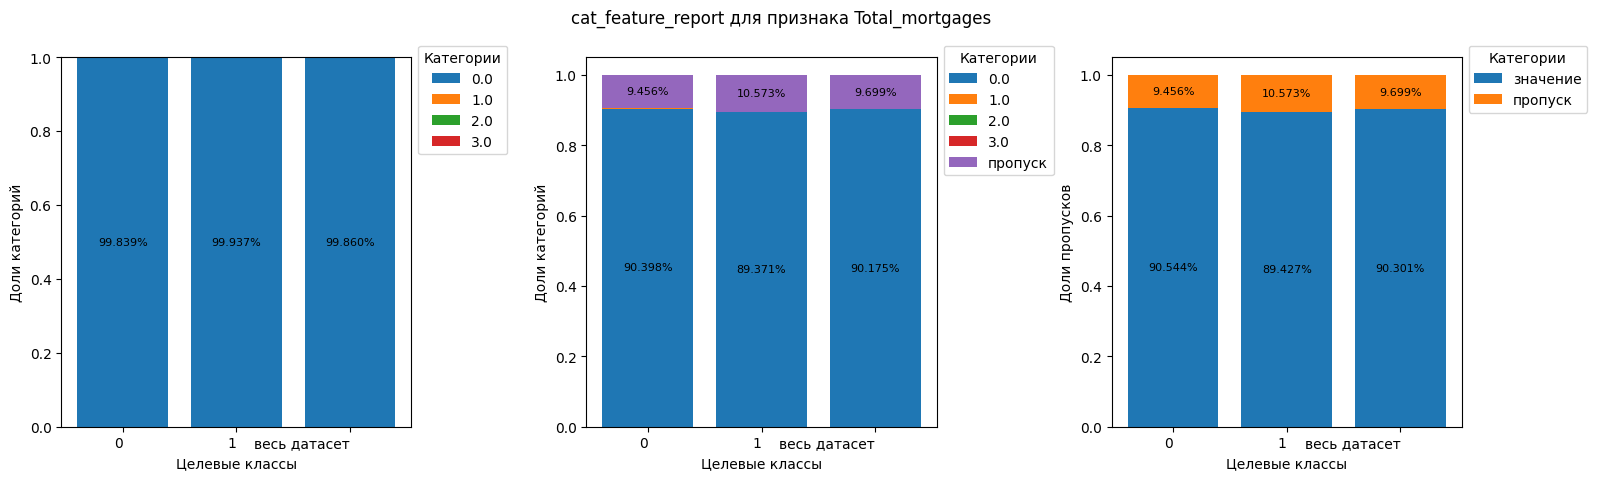

In [70]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Total_mortgages', target_colname='60_6mob')

### `Total_microcredits` - Количество микрокредитов	

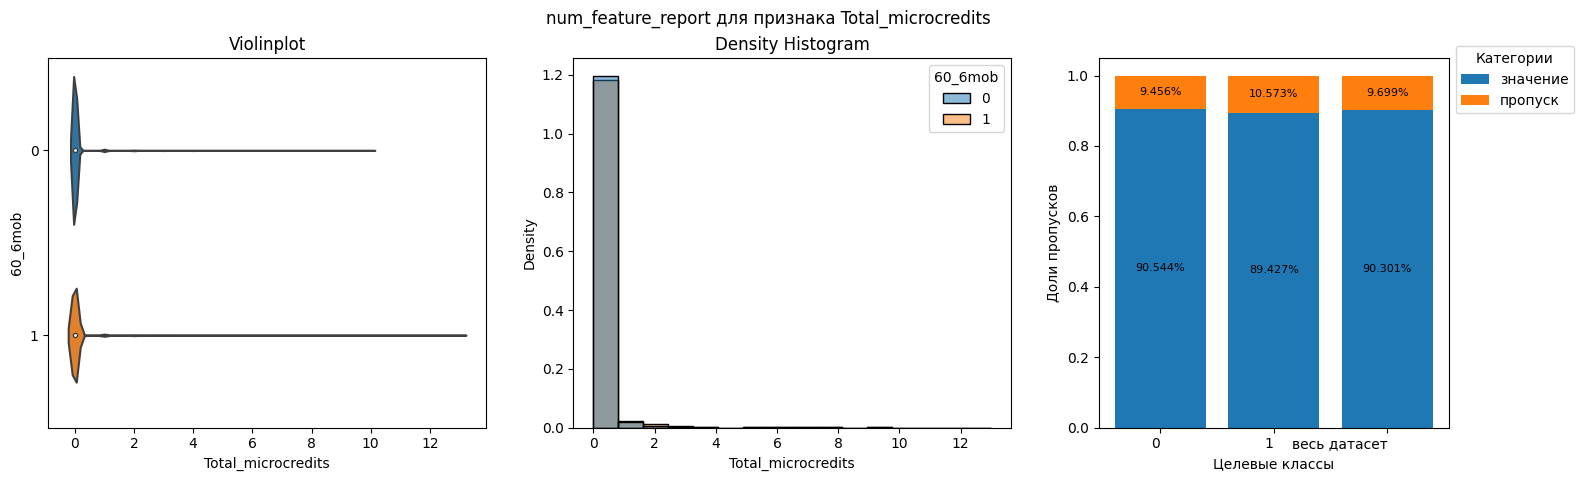

In [71]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Total_microcredits', target_colname='60_6mob')

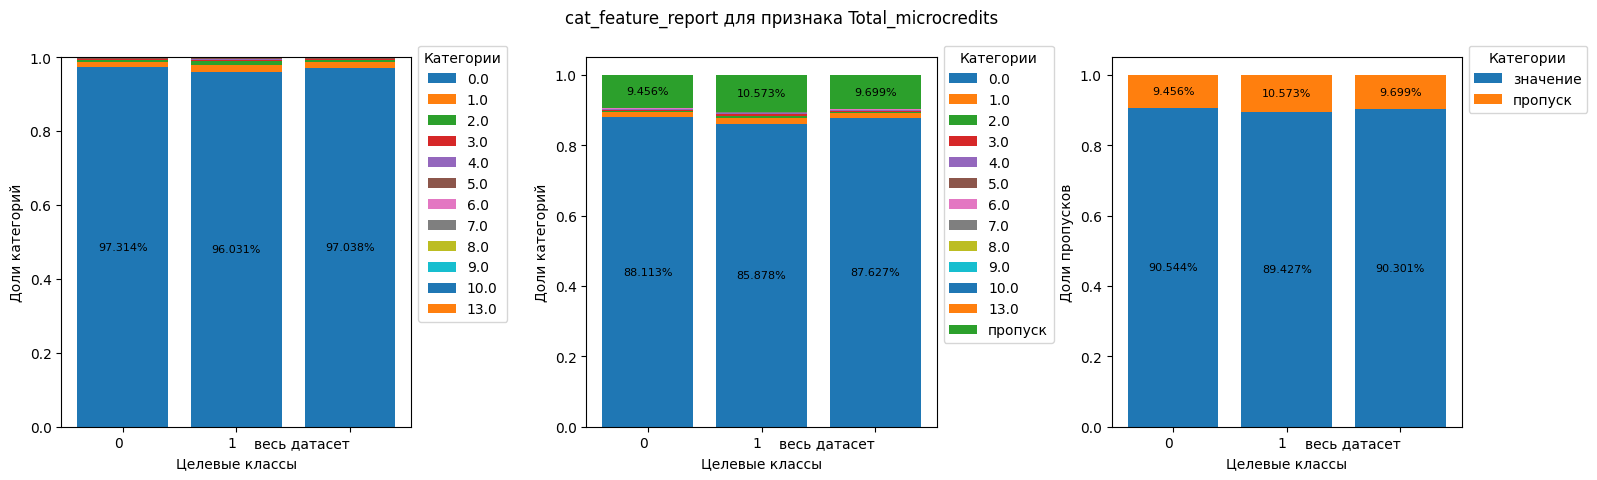

In [72]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Total_microcredits', target_colname='60_6mob')

### `Nb_active_consumer_credit` - Количество активных потреб кредитов	

In [16]:
#квази-константная фича
nbki['Nb_active_consumer_credit'].value_counts()

Nb_active_consumer_credit
0.0    21909
1.0       68
Name: count, dtype: int64

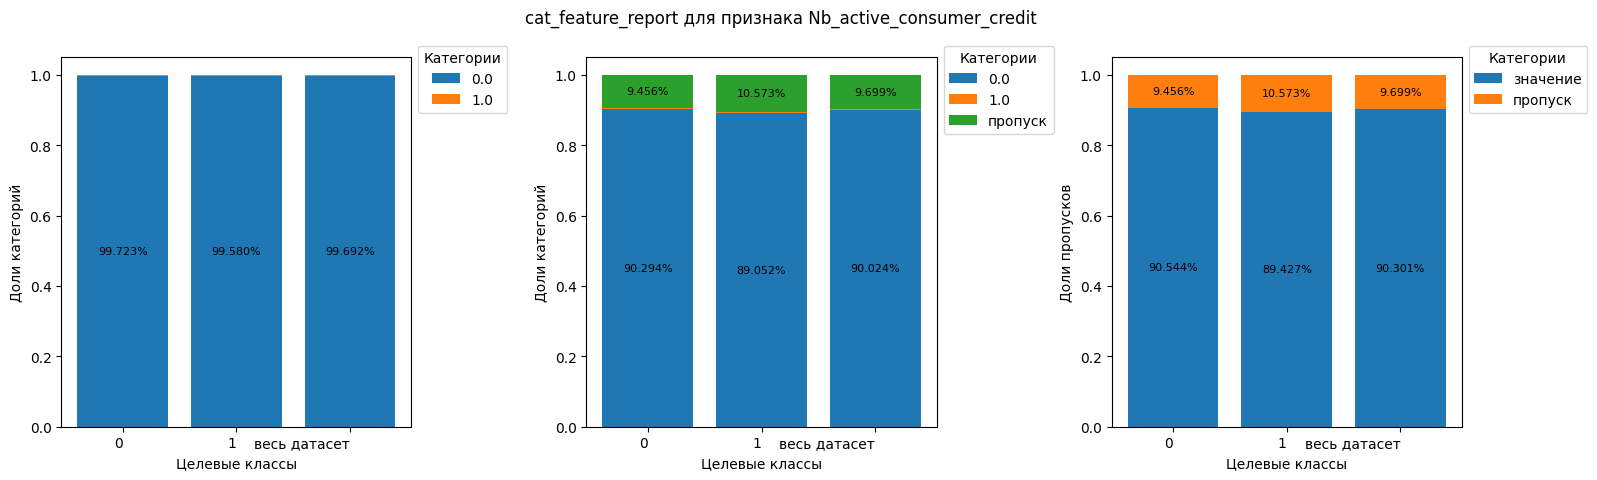

In [74]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_active_consumer_credit', target_colname='60_6mob')

In [17]:
nbki = nbki.drop(columns='Nb_active_consumer_credit')

### `Nb_active_rcc` - Количество активных карт	

In [14]:
#квази-константная фича - ДРОП?
nbki['Nb_active_rcc'].value_counts()

Nb_active_rcc
0.0    21954
1.0       23
Name: count, dtype: int64

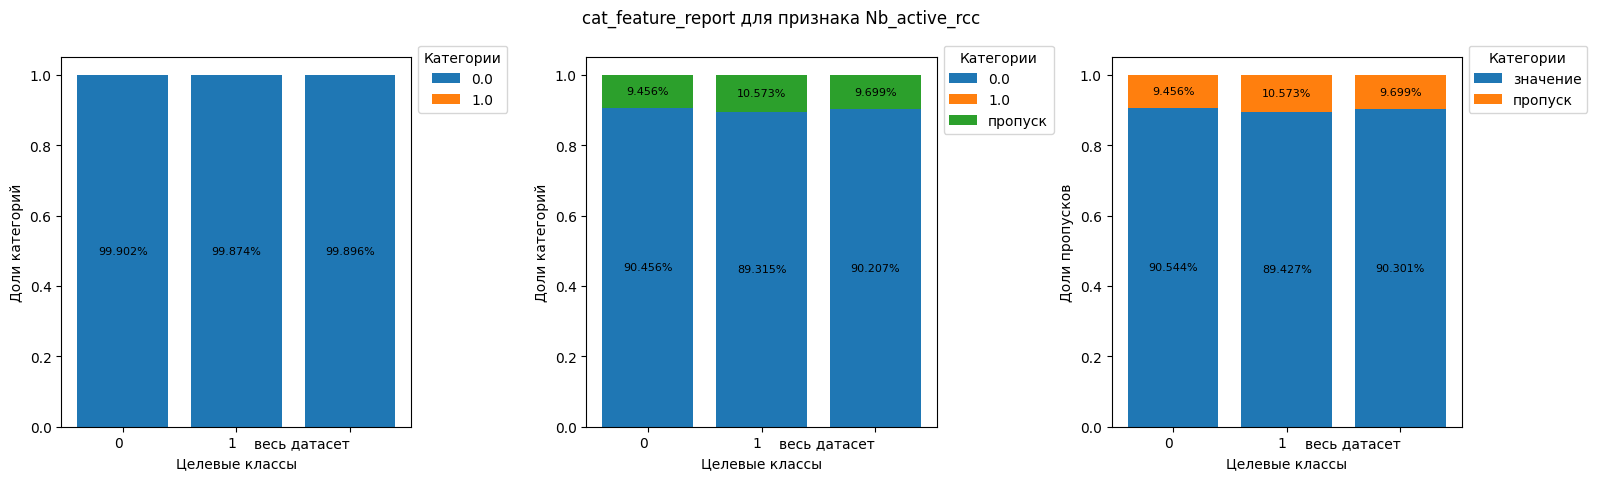

In [76]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Nb_active_rcc', target_colname='60_6mob')

In [15]:
nbki = nbki.drop(columns='Nb_active_rcc')

### `Total_consumer_credit` - Количество потреб кредитов	

In [77]:
#квази-константная фича
nbki['Total_consumer_credit'].value_counts()

Total_consumer_credit
0.0    21893
1.0      151
2.0       34
3.0       23
4.0       12
Name: count, dtype: int64

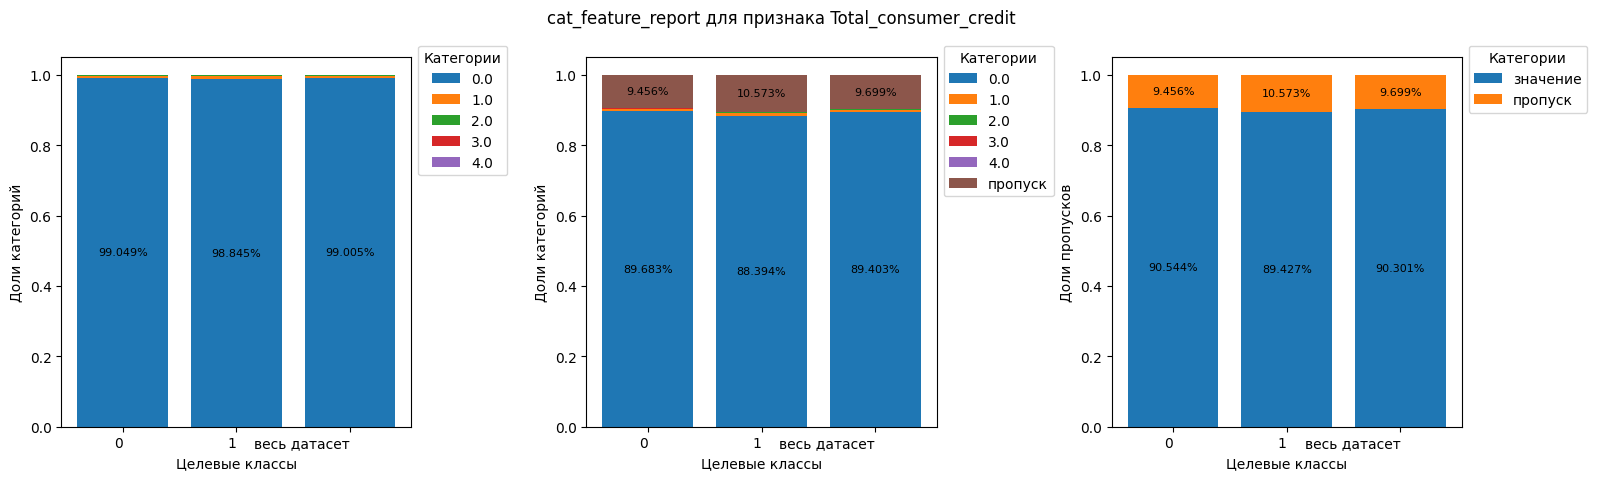

In [78]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Total_consumer_credit', target_colname='60_6mob')

In [ ]:
# nbki = nbki.drop(columns='Total_consumer_credit')

### `Total_rcc` - Количество активных карт	

In [18]:
nbki['Total_rcc'].value_counts()

Total_rcc
0.0    21950
1.0       27
Name: count, dtype: int64

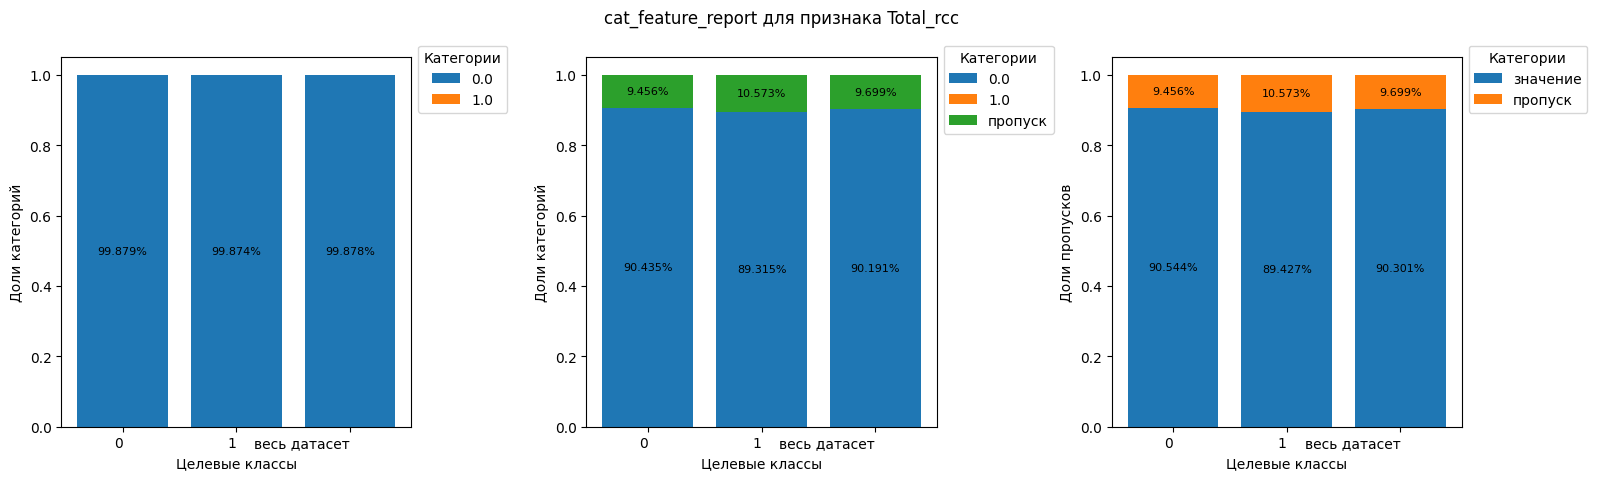

In [80]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Total_rcc', target_colname='60_6mob')

In [19]:
nbki = nbki.drop(columns='Total_rcc')

### `Is_FICO` - Был ли запрос FICO скора	

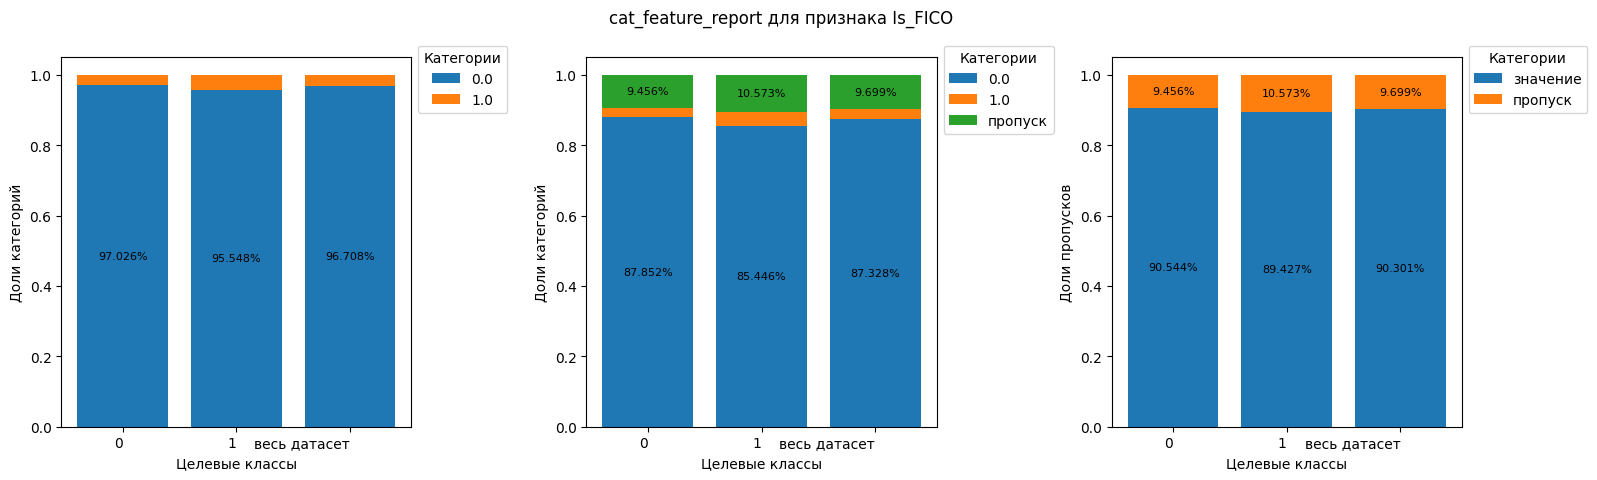

In [81]:
fig, axes = utils.eda.cat_feature_report(nbki, feature_colname='Is_FICO', target_colname='60_6mob')

In [21]:
nbki.drop(columns='Is_FICO', inplace=True)

### `Fico_score` - ?

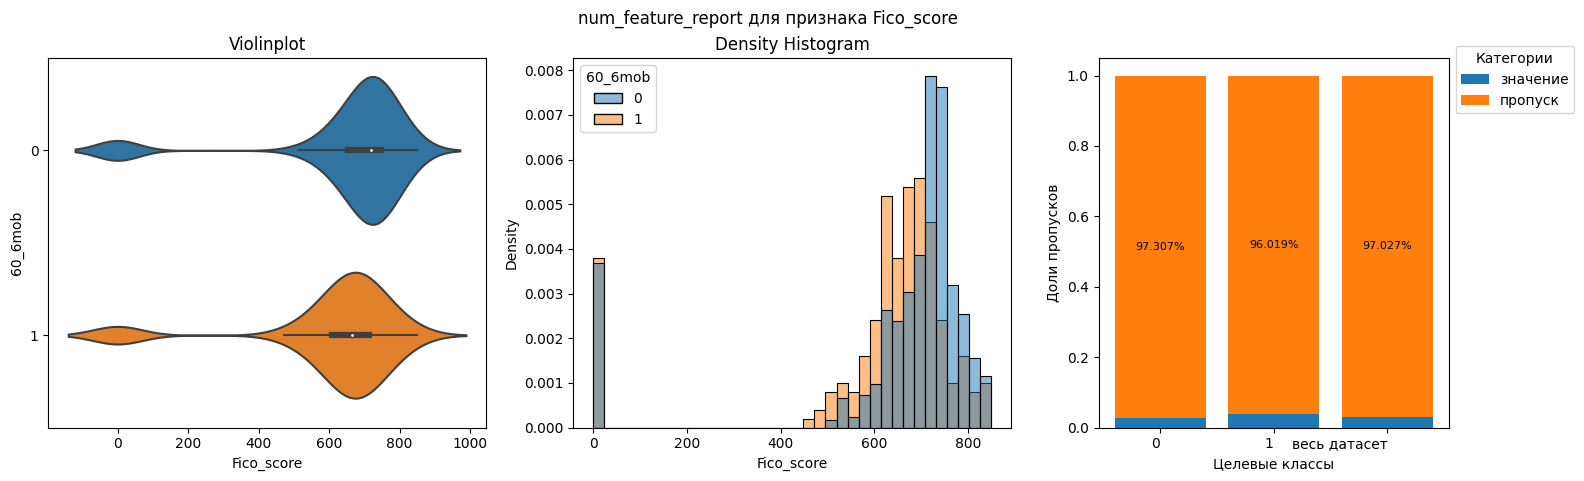

In [82]:
fig, axes = utils.eda.num_feature_report(nbki, feature_colname='Fico_score', target_colname='60_6mob')

In [22]:
# 97% пропущенно
nbki = nbki.drop(columns='Fico_score')

### `Reg_region` - Регион регистрации	

In [84]:
nbki['Reg_region'].isna().sum()

23632

In [23]:
nbki = nbki.drop(columns='Reg_region')

### `Liv_region` - Регион проживания	

In [86]:
nbki['Liv_region'].isna().sum()

23649

In [24]:
nbki = nbki.drop(columns='Liv_region')

## Корреляции

In [88]:
nbki_corr = nbki.drop(columns=[
    'dtstart',
    'Own_active_accounts_nb',
    'RCC_credit_limit',
    'Nb_active_mortgages',
    'Nb_active_consumer_credit',
    'Nb_active_rcc',
    'Is_FICO' 
]
                     )
# nbki_corr = nbki_corr.astype('float')

### Pearson

In [33]:
nbki.columns.to_list()

['dtstart',
 'Total_accounts',
 'Total_negative_accounts',
 'Total_active_accounts',
 'Total_credit_limit',
 'Total_overdue_amount',
 'Total_outstanding_amount',
 'Total_installment_amount',
 'Total_installment_amount_calc',
 'Total_inquiries',
 'Recent_inquiries',
 'Nb_delays_5_30_ever',
 'Nb_delays_30_60_ever',
 'Nb_delays_60_90_ever',
 'Nb_delays_90_ever',
 'Nb_delays_5_30_2y',
 'Nb_delays_30_60_2y',
 'Nb_delays_60_90_2y',
 'Nb_delays_90_2y',
 'Days_since_last_credit',
 'Own_active_accounts_nb',
 'Max_overdue',
 'RCC_credit_limit',
 'Nb_active_mortgages',
 'Nb_active_microcredits',
 'Total_mortgages',
 'Total_microcredits',
 'Total_consumer_credit',
 '30_2mob',
 '60_6mob']

In [38]:
nbki['Total_microcredits'].value_counts()

Total_microcredits
0.0     21323
1.0       340
2.0       122
3.0        55
4.0        48
5.0        35
6.0        18
7.0        16
8.0        11
9.0         6
10.0        2
13.0        1
Name: count, dtype: int64

In [39]:
nbki['Nb_active_microcredits'].value_counts()

Nb_active_microcredits
0.0    21658
1.0      231
2.0       61
3.0       21
4.0        5
6.0        1
Name: count, dtype: int64

In [66]:
drop = [
    'Total_mortgages',
    'Total_credit_limit',
    'Total_active_accounts',
    'Total_credit_limit',
    'Total_accounts',
    'Total_microcredits',
    'Total_outstanding_amount',
    'Nb_delays_5_30_ever',
    'Nb_delays_30_60_ever',
    'Nb_delays_60_90_ever',
    'Nb_delays_90_ever',
    'Nb_delays_30_60_2y',
    'Nb_delays_60_90_2y',
    'Nb_active_microcredits',
    'Total_installment_amount_calc',
    'Total_negative_accounts',
]

In [67]:

droupped = nbki.drop(drop, axis=1)

In [72]:
droupped.columns.to_list()

['dtstart',
 'Total_overdue_amount',
 'Total_installment_amount',
 'Total_inquiries',
 'Recent_inquiries',
 'Nb_delays_5_30_2y',
 'Nb_delays_90_2y',
 'Days_since_last_credit',
 'Own_active_accounts_nb',
 'Max_overdue',
 'RCC_credit_limit',
 'Nb_active_mortgages',
 'Total_consumer_credit',
 '30_2mob',
 '60_6mob']

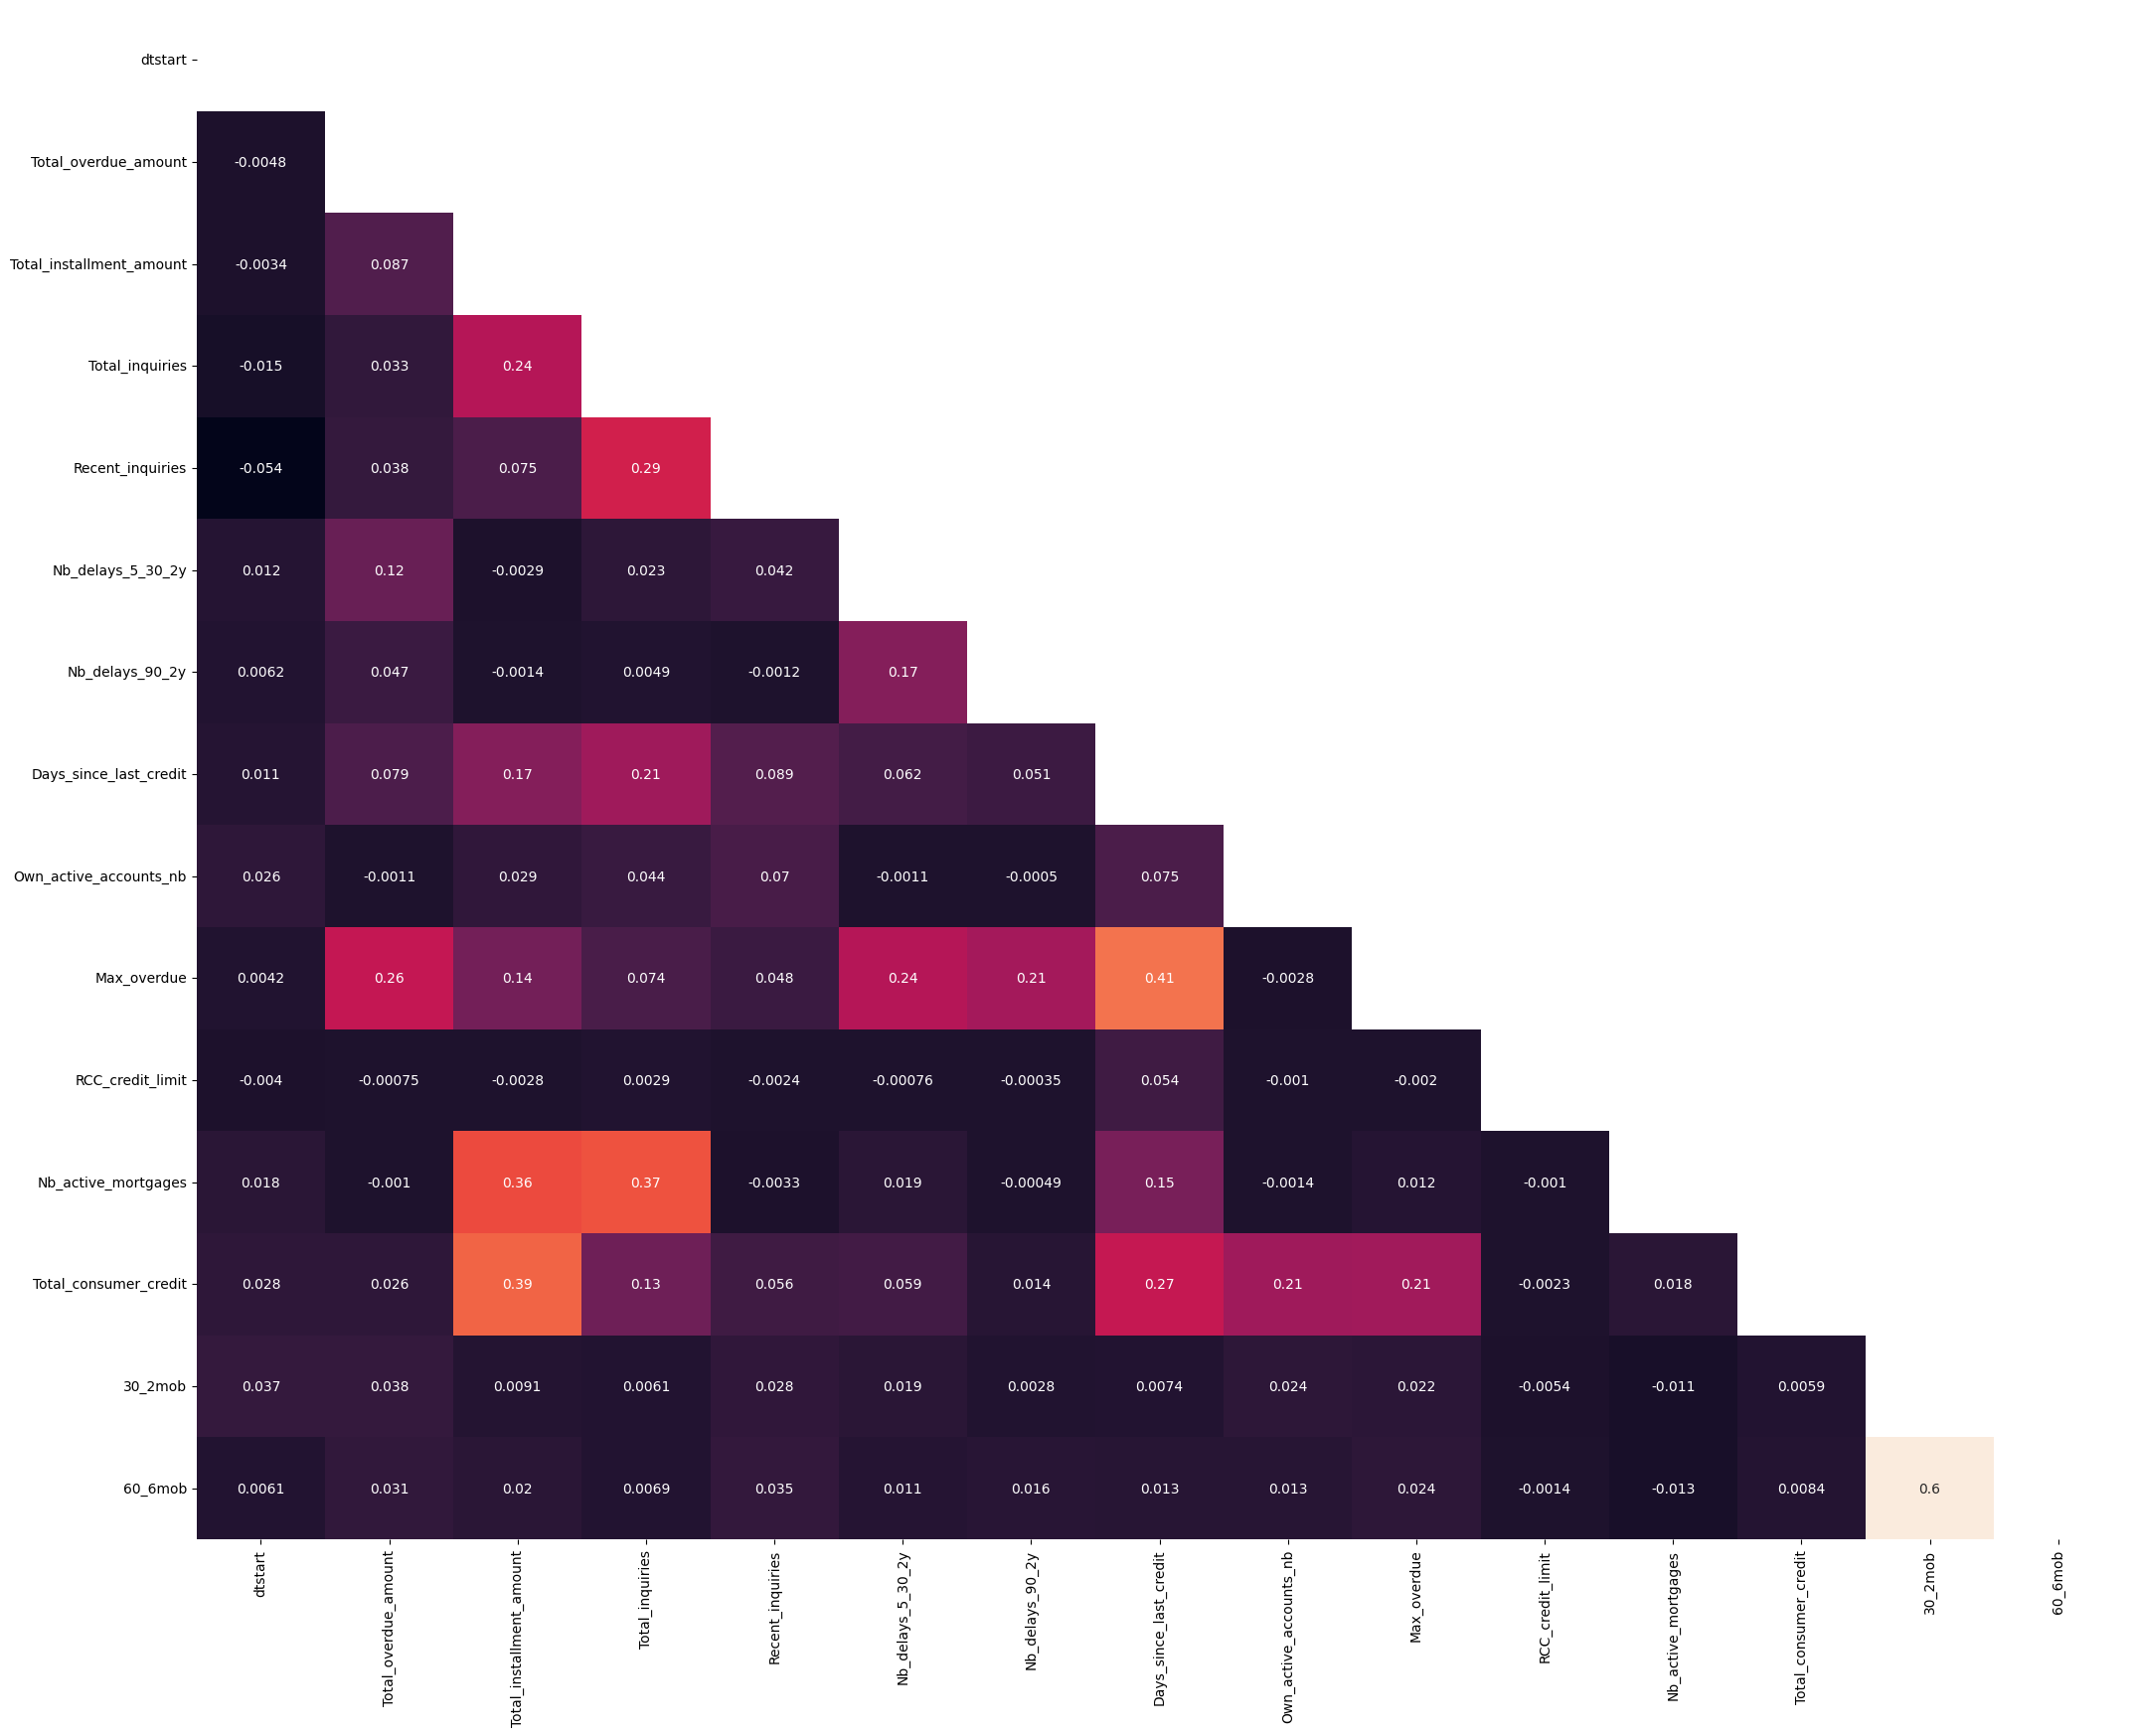

In [68]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(
    droupped.corr(method='pearson'),
    mask=np.triu(np.ones_like(droupped.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

### Spearman

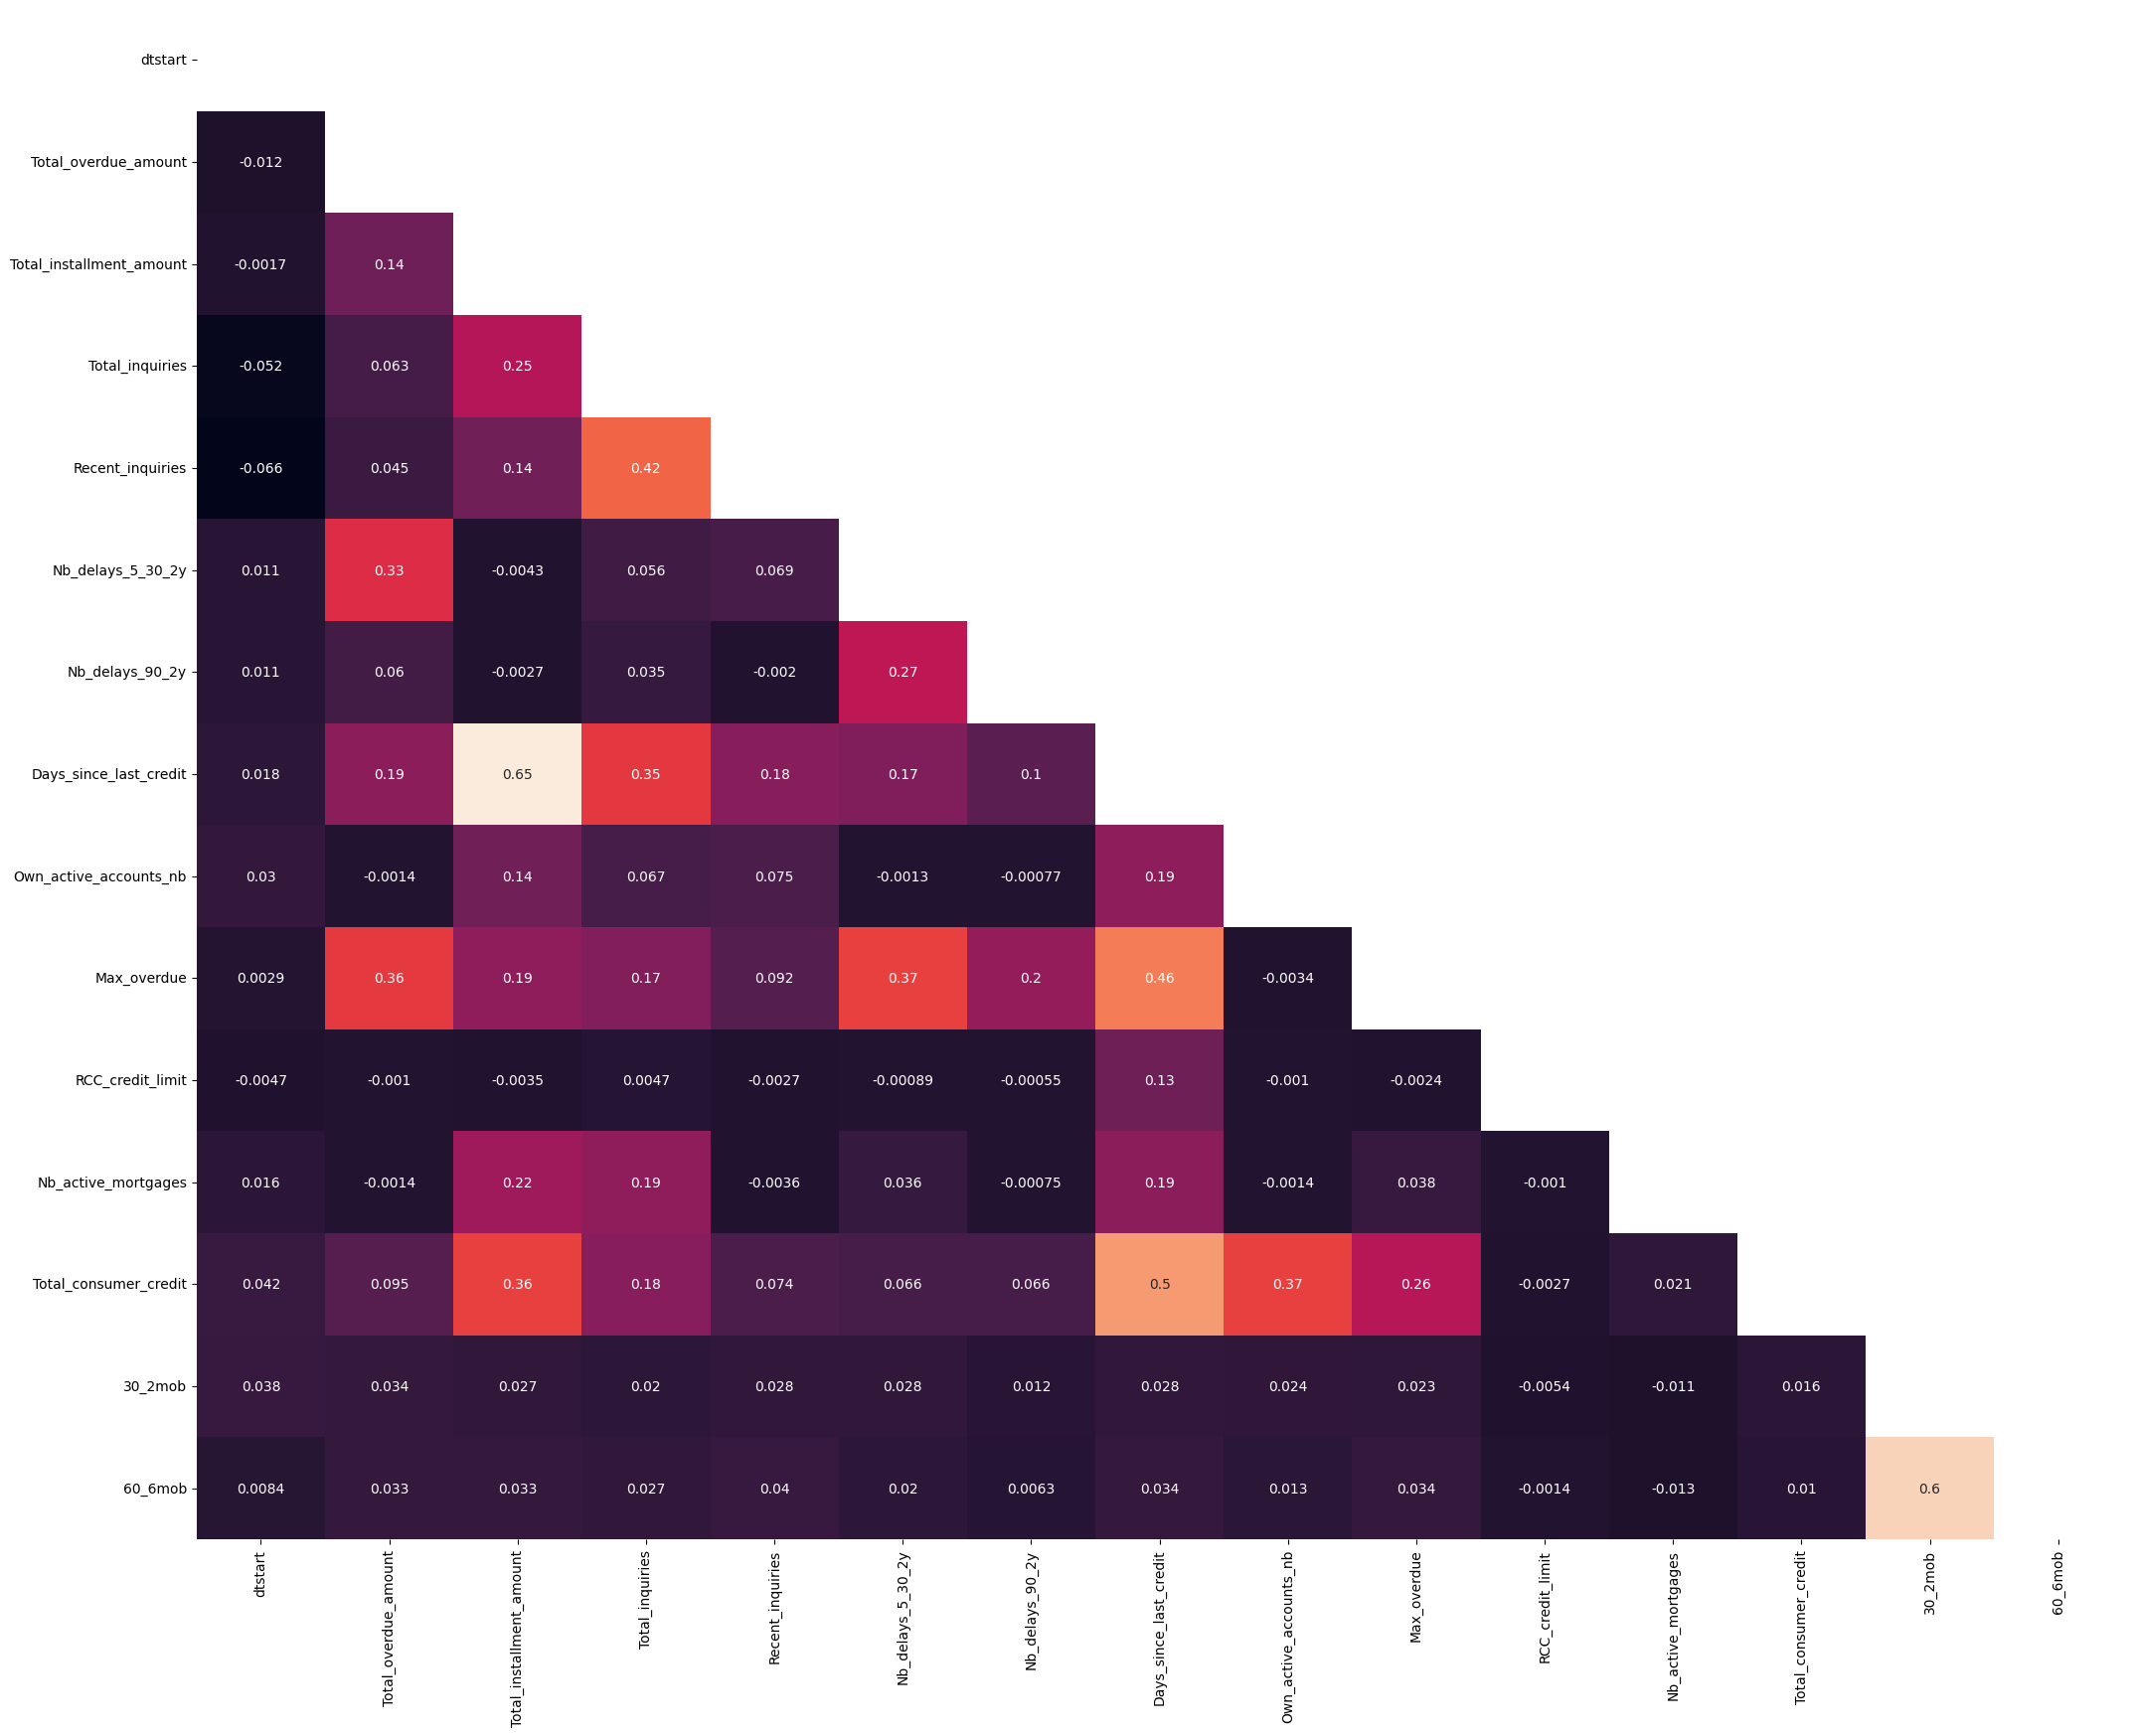

In [69]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(
    droupped.corr(method='spearman'),
    mask=np.triu(np.ones_like(droupped.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()